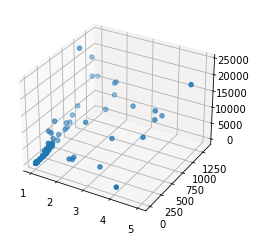

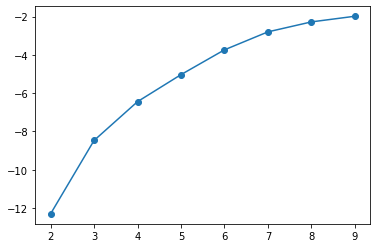

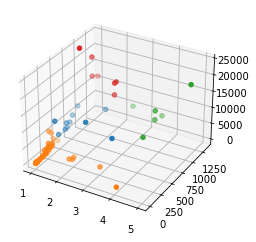

In [1]:
import torch
import pickle
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import PolynomialFeatures, MinMaxScaler
# importing/exporting parameters

path = 'data/skill_builder_data_corrected_collapsed.csv'
blocks_file = 'output/blocksdfs_blocks_0.pkl'
blocks_trainer_file = 'output/blocks_trainer_0.pkl'
bkt_params_file = 'output/bkt_params_0.pkl'
if __name__ == '__main__':
    #### 0. LOAD INPUT
    # load skillbuilder data
    with open(blocks_file, 'rb') as out:
        block_dfs, blocks = pickle.load(out)
    # load trained blocks trainer
    with open(blocks_trainer_file, 'rb') as out: 
        blocks_trainer = pickle.load(out)
    #### 1. DIFFERENT GROUPS OF BLOCKS (N_SKILLS, N_STUDENTS, N_ROWS) AND HYPERPARAMETERS (LR, N_STEPS, DELTA)
    # extract block characteristics
    n_skills, n_students, n_rows = ([] for i in range(3))
    for df in block_dfs:
        n_skills.append(df.shape[1] - 4)
        n_students.append(df["user_id"].nunique())
        n_rows.append(df.shape[0])
    # create dataframe
    block_characteristics = pd.DataFrame({
        'n_skills': n_skills,
        'n_students': n_students,
        'n_rows': n_rows
    })
    # plot block characteristics
    fig = plt.figure()
    ax = fig.add_subplot(projection='3d')
    ax.scatter(n_skills, n_students, n_rows)
    plt.show()
    # preprocess dataframe
    X = block_characteristics.values
    poly = PolynomialFeatures(2)
    X = poly.fit_transform(X)
    scaler = MinMaxScaler()
    X = scaler.fit_transform(X)
    # kmeans clustering
    labels = {}
    scores = []
    for k in range(2, 10):
        kmeans = KMeans(n_clusters=k).fit(X)
        labels[k] = kmeans.labels_
        scores.append(kmeans.score(X))
    # cluster results (ellbow trick)
    plt.plot(range(2, 10), scores)
    plt.scatter(range(2, 10), scores)
    plt.show()
    block_characteristics['cluster'] = labels[4]
    # plot clustered block characteristics
    fig = plt.figure()
    ax = fig.add_subplot(projection='3d')
    for k in range(4):
        subset = block_characteristics['cluster'] == k
        ax.scatter(block_characteristics['n_skills'][subset],
                   block_characteristics['n_students'][subset],
                   block_characteristics['n_rows'][subset])
    plt.show()

Cluster ... 1
# Rows ... 1332
# Students ... 318
# Skills ... 1


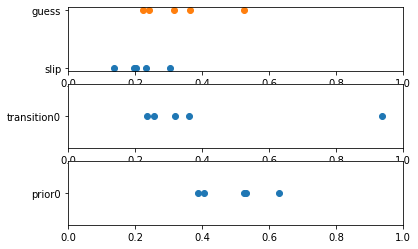

Cluster ... 1
# Rows ... 717
# Students ... 264
# Skills ... 3


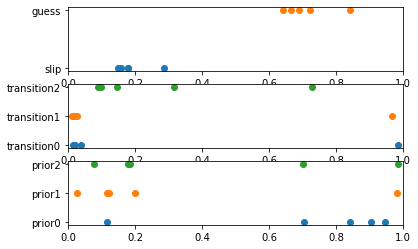

Cluster ... 1
# Rows ... 456
# Students ... 202
# Skills ... 1


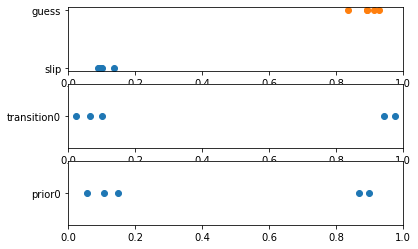

Cluster ... 0
# Rows ... 8757
# Students ... 525
# Skills ... 2


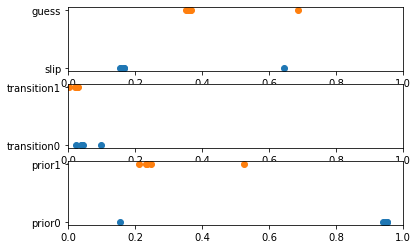

Cluster ... 1
# Rows ... 213
# Students ... 75
# Skills ... 1


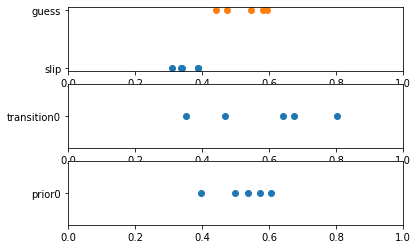

Cluster ... 1
# Rows ... 90
# Students ... 15
# Skills ... 1


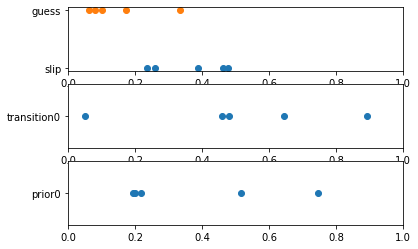

Cluster ... 1
# Rows ... 389
# Students ... 88
# Skills ... 1


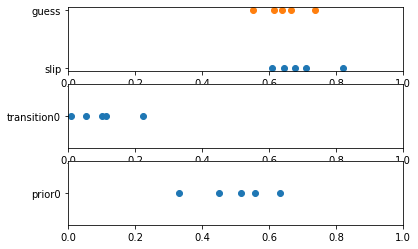

Cluster ... 1
# Rows ... 89
# Students ... 41
# Skills ... 4


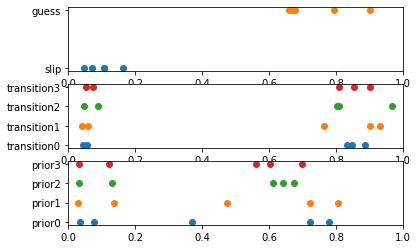

Cluster ... 1
# Rows ... 47
# Students ... 29
# Skills ... 1


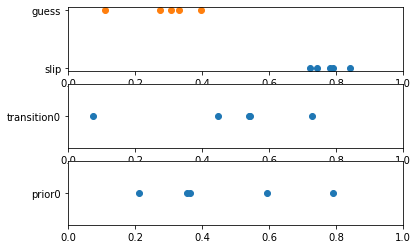

Cluster ... 1
# Rows ... 117
# Students ... 41
# Skills ... 1


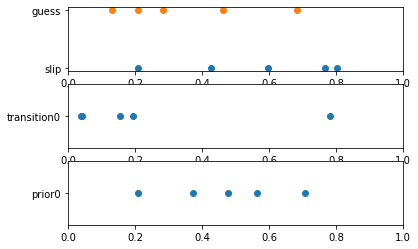

Cluster ... 1
# Rows ... 1183
# Students ... 264
# Skills ... 2


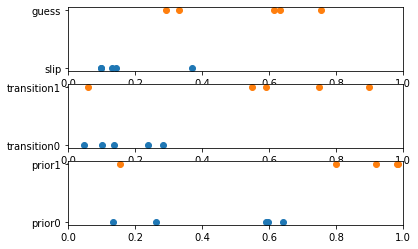

Cluster ... 1
# Rows ... 91
# Students ... 39
# Skills ... 1


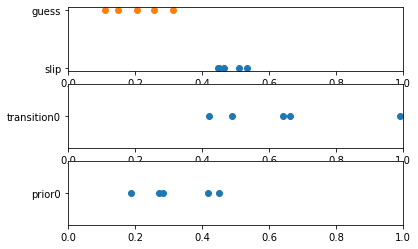

Cluster ... 1
# Rows ... 1524
# Students ... 458
# Skills ... 1


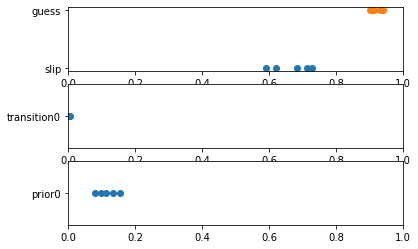

Cluster ... 1
# Rows ... 278
# Students ... 140
# Skills ... 1


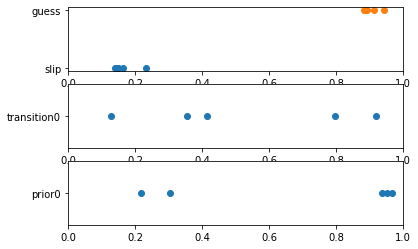

Cluster ... 1
# Rows ... 6611
# Students ... 283
# Skills ... 1


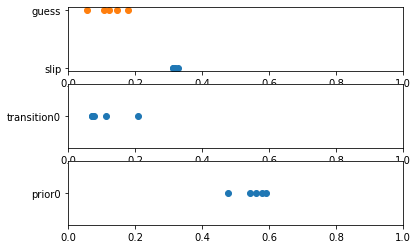

Cluster ... 1
# Rows ... 1970
# Students ... 348
# Skills ... 1


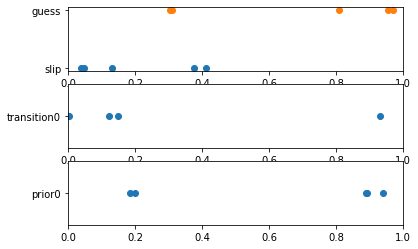

Cluster ... 3
# Rows ... 12741
# Students ... 1226
# Skills ... 1


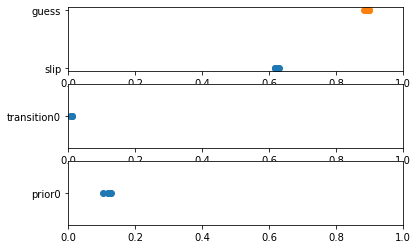

Cluster ... 2
# Rows ... 8980
# Students ... 1063
# Skills ... 4


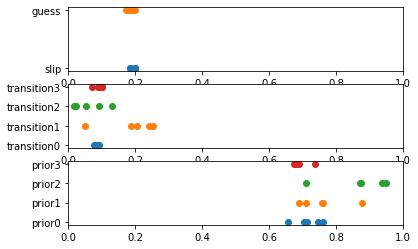

Cluster ... 0
# Rows ... 7058
# Students ... 900
# Skills ... 1


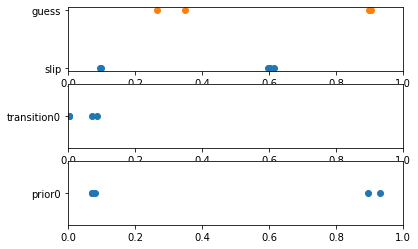

Cluster ... 3
# Rows ... 11334
# Students ... 1353
# Skills ... 1


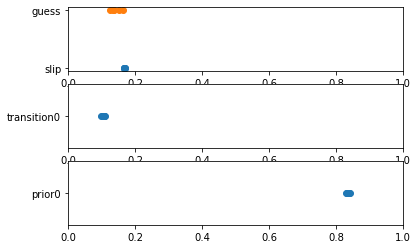

Cluster ... 1
# Rows ... 459
# Students ... 176
# Skills ... 1


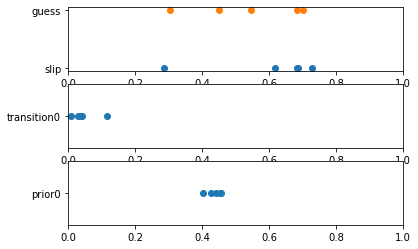

Cluster ... 1
# Rows ... 877
# Students ... 233
# Skills ... 2


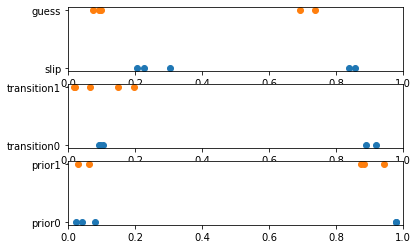

Cluster ... 1
# Rows ... 1760
# Students ... 194
# Skills ... 1


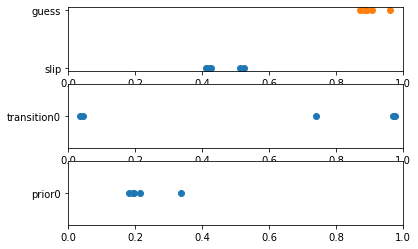

Cluster ... 1
# Rows ... 115
# Students ... 95
# Skills ... 1


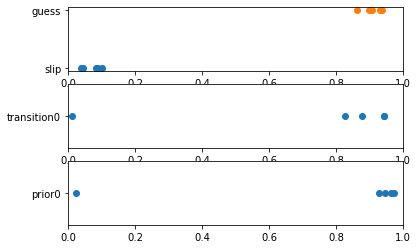

Cluster ... 1
# Rows ... 495
# Students ... 215
# Skills ... 1


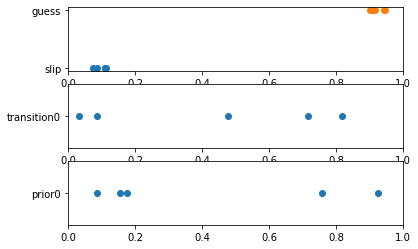

Cluster ... 1
# Rows ... 2978
# Students ... 269
# Skills ... 1


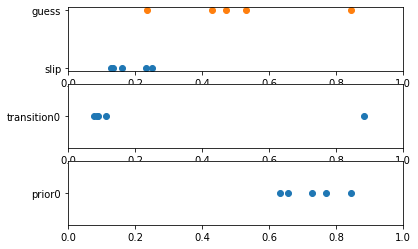

Cluster ... 1
# Rows ... 286
# Students ... 168
# Skills ... 1


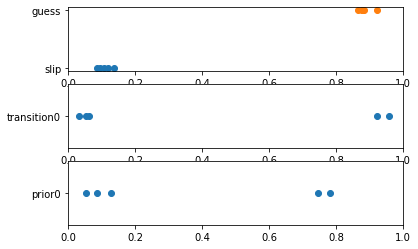

Cluster ... 1
# Rows ... 491
# Students ... 135
# Skills ... 1


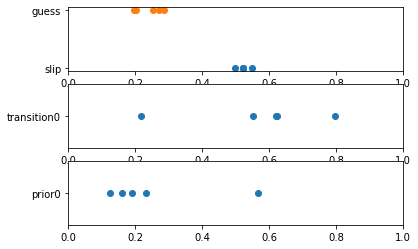

Cluster ... 1
# Rows ... 1480
# Students ... 283
# Skills ... 1


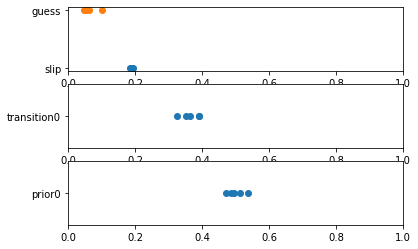

Cluster ... 1
# Rows ... 1285
# Students ... 304
# Skills ... 1


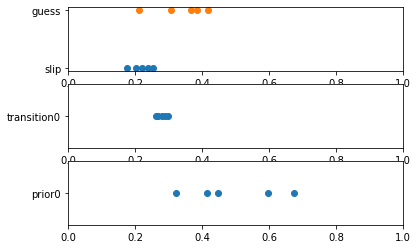

Cluster ... 1
# Rows ... 926
# Students ... 345
# Skills ... 1


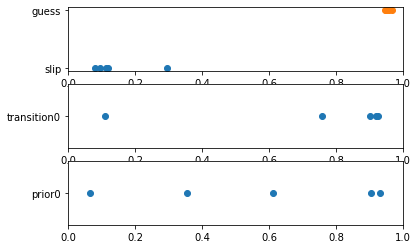

Cluster ... 1
# Rows ... 1706
# Students ... 184
# Skills ... 1


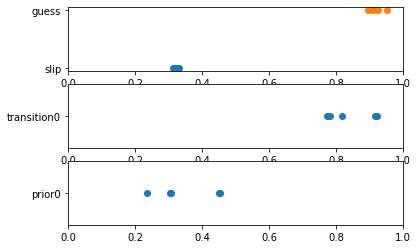

Cluster ... 0
# Rows ... 3072
# Students ... 664
# Skills ... 1


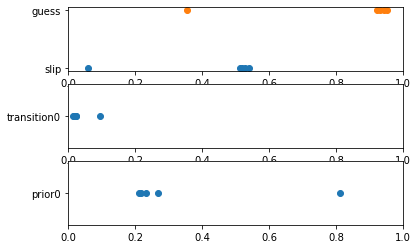

Cluster ... 0
# Rows ... 4659
# Students ... 651
# Skills ... 1


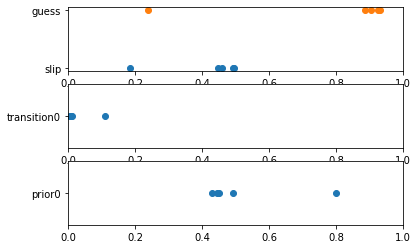

Cluster ... 3
# Rows ... 24253
# Students ... 961
# Skills ... 1


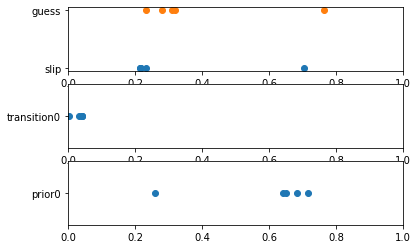

Cluster ... 0
# Rows ... 8115
# Students ... 412
# Skills ... 1


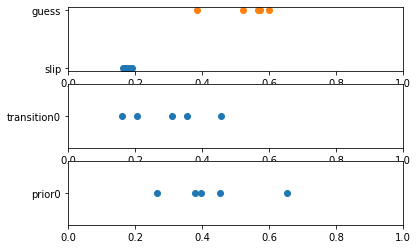

Cluster ... 1
# Rows ... 305
# Students ... 11
# Skills ... 1


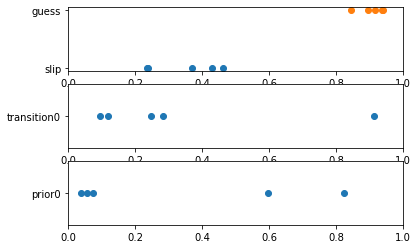

Cluster ... 1
# Rows ... 237
# Students ... 147
# Skills ... 1


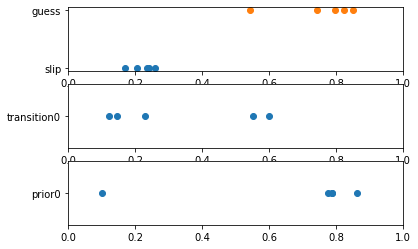

Cluster ... 1
# Rows ... 280
# Students ... 229
# Skills ... 1


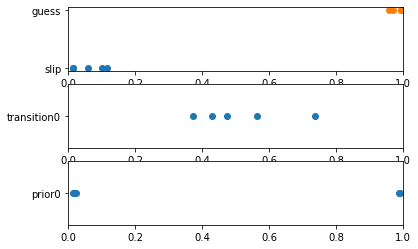

Cluster ... 1
# Rows ... 949
# Students ... 223
# Skills ... 1


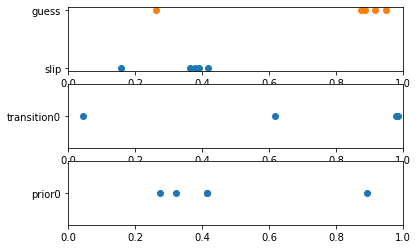

Cluster ... 1
# Rows ... 36
# Students ... 8
# Skills ... 1


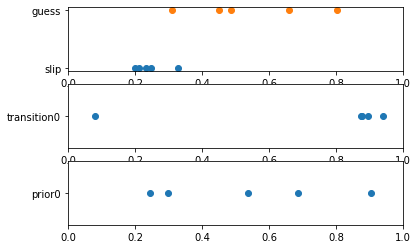

Cluster ... 1
# Rows ... 5398
# Students ... 333
# Skills ... 1


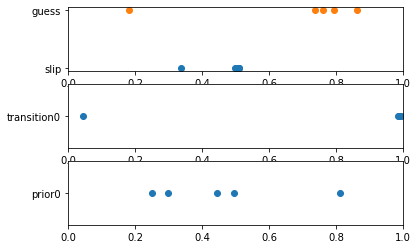

Cluster ... 1
# Rows ... 102
# Students ... 6
# Skills ... 1


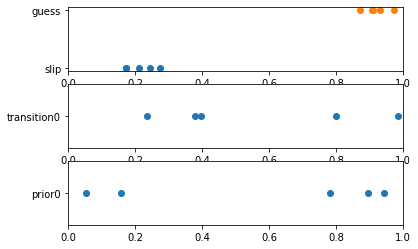

Cluster ... 1
# Rows ... 32
# Students ... 30
# Skills ... 1


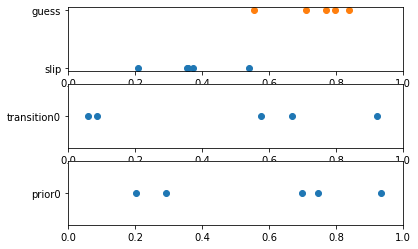

Cluster ... 1
# Rows ... 392
# Students ... 13
# Skills ... 1


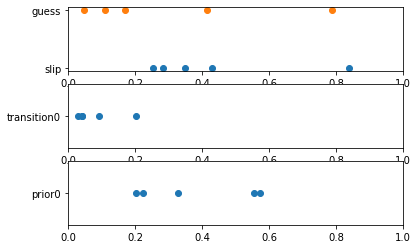

Cluster ... 1
# Rows ... 234
# Students ... 22
# Skills ... 1


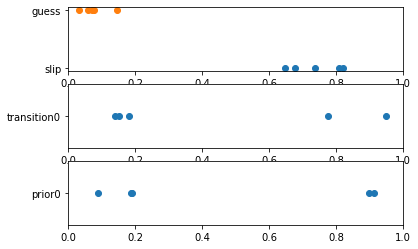

Cluster ... 1
# Rows ... 32
# Students ... 14
# Skills ... 1


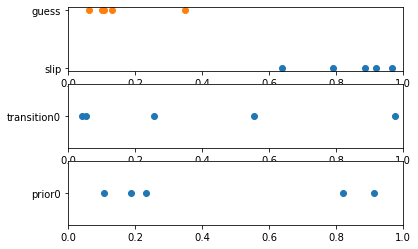

Cluster ... 1
# Rows ... 87
# Students ... 6
# Skills ... 1


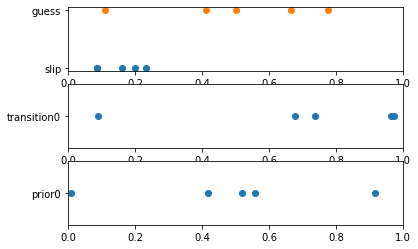

Cluster ... 1
# Rows ... 33
# Students ... 33
# Skills ... 1


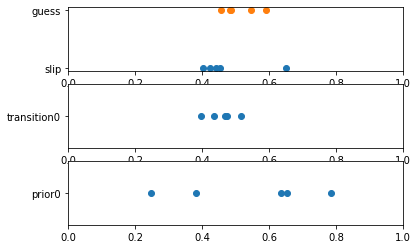

Cluster ... 1
# Rows ... 398
# Students ... 28
# Skills ... 1


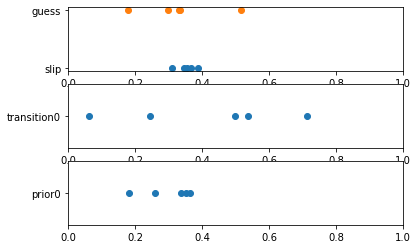

Cluster ... 1
# Rows ... 1792
# Students ... 307
# Skills ... 1


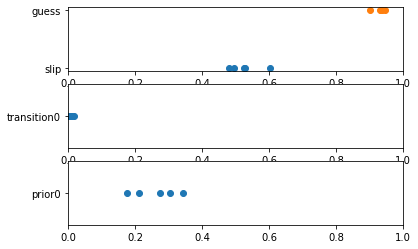

Cluster ... 1
# Rows ... 108
# Students ... 5
# Skills ... 1


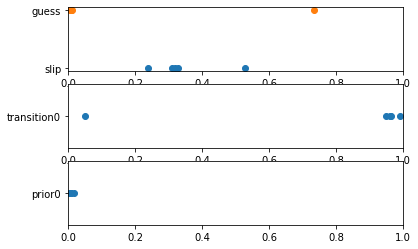

Cluster ... 1
# Rows ... 1895
# Students ... 167
# Skills ... 2


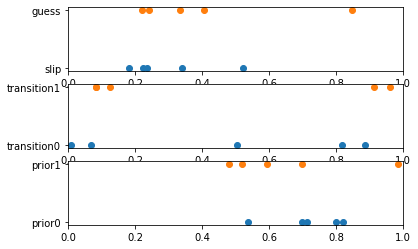

Cluster ... 1
# Rows ... 353
# Students ... 20
# Skills ... 1


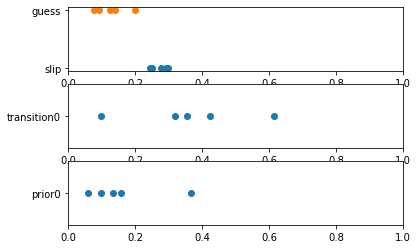

Cluster ... 1
# Rows ... 1149
# Students ... 264
# Skills ... 1


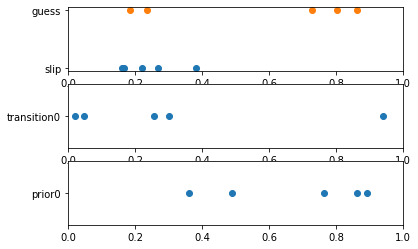

Cluster ... 1
# Rows ... 1804
# Students ... 230
# Skills ... 1


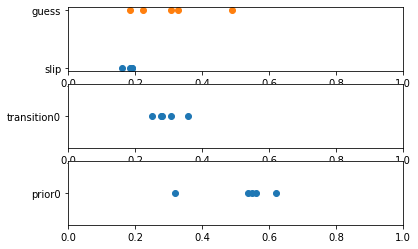

Cluster ... 1
# Rows ... 1769
# Students ... 256
# Skills ... 1


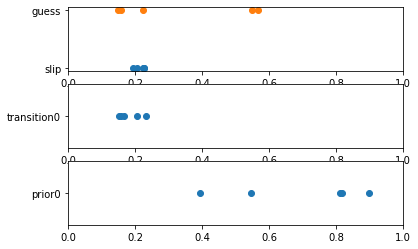

Cluster ... 1
# Rows ... 671
# Students ... 264
# Skills ... 1


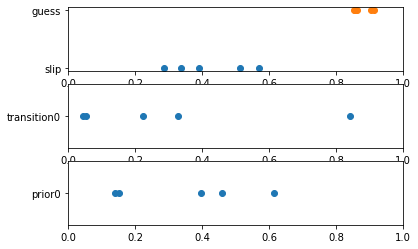

Cluster ... 3
# Rows ... 13434
# Students ... 1164
# Skills ... 2


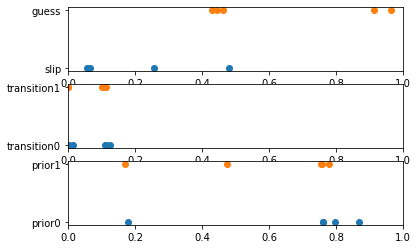

Cluster ... 1
# Rows ... 951
# Students ... 229
# Skills ... 1


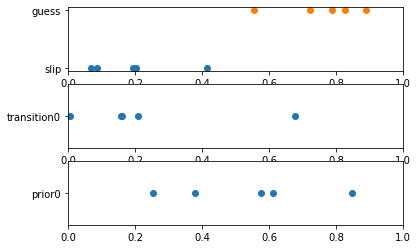

Cluster ... 0
# Rows ... 4029
# Students ... 724
# Skills ... 1


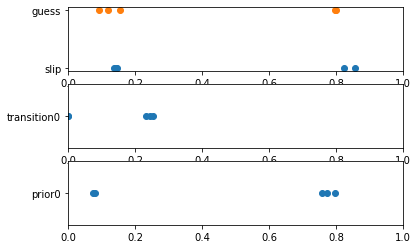

Cluster ... 1
# Rows ... 3256
# Students ... 367
# Skills ... 1


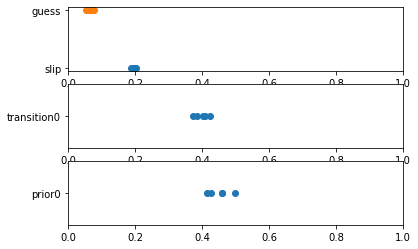

Cluster ... 0
# Rows ... 5547
# Students ... 783
# Skills ... 1


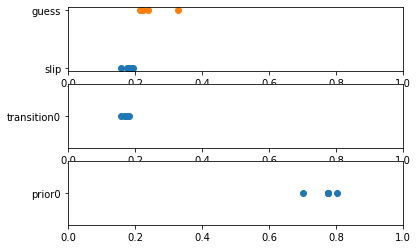

Cluster ... 0
# Rows ... 3050
# Students ... 483
# Skills ... 1


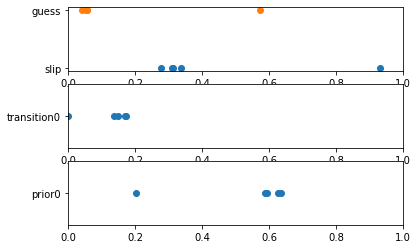

Cluster ... 1
# Rows ... 1859
# Students ... 354
# Skills ... 1


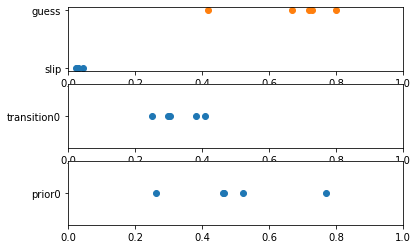

Cluster ... 1
# Rows ... 288
# Students ... 87
# Skills ... 1


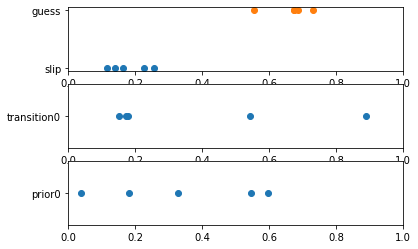

Cluster ... 1
# Rows ... 1888
# Students ... 270
# Skills ... 1


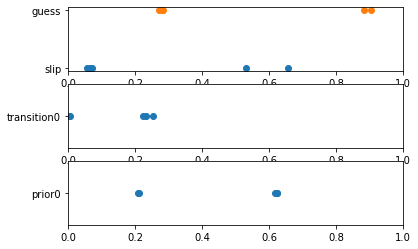

Cluster ... 1
# Rows ... 2813
# Students ... 274
# Skills ... 1


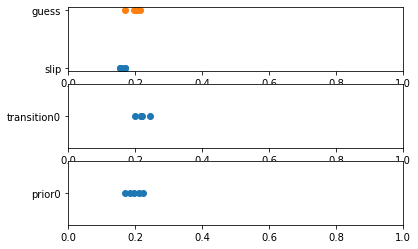

Cluster ... 1
# Rows ... 646
# Students ... 155
# Skills ... 1


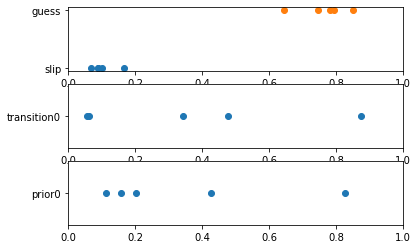

Cluster ... 0
# Rows ... 2947
# Students ... 619
# Skills ... 1


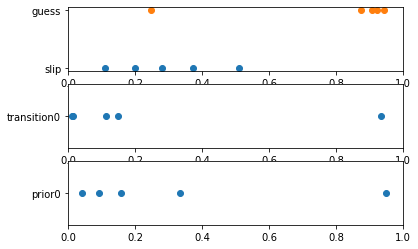

Cluster ... 1
# Rows ... 632
# Students ... 206
# Skills ... 1


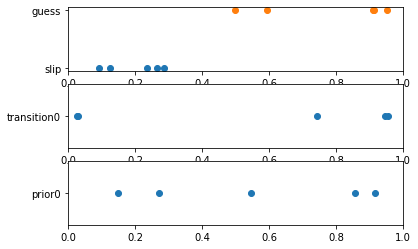

Cluster ... 1
# Rows ... 1533
# Students ... 346
# Skills ... 1


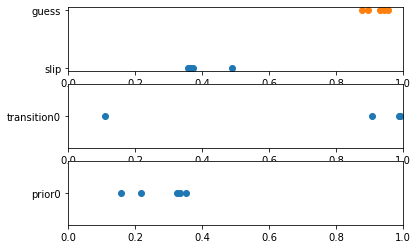

Cluster ... 1
# Rows ... 843
# Students ... 282
# Skills ... 1


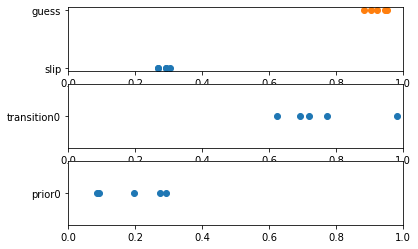

Cluster ... 2
# Rows ... 12450
# Students ... 900
# Skills ... 4


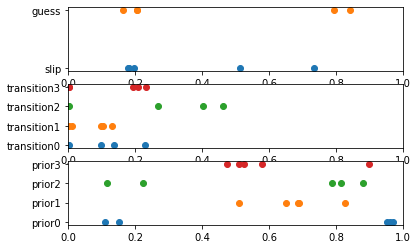

Cluster ... 2
# Rows ... 10417
# Students ... 999
# Skills ... 3


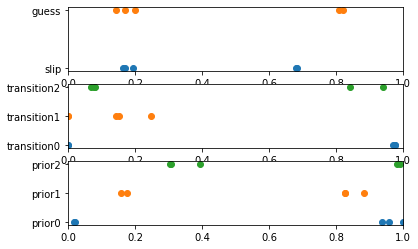

Cluster ... 2
# Rows ... 7717
# Students ... 625
# Skills ... 4


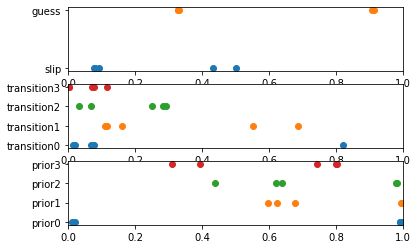

Cluster ... 0
# Rows ... 6145
# Students ... 527
# Skills ... 3


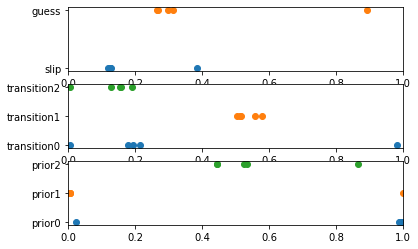

Cluster ... 3
# Rows ... 9772
# Students ... 1161
# Skills ... 2


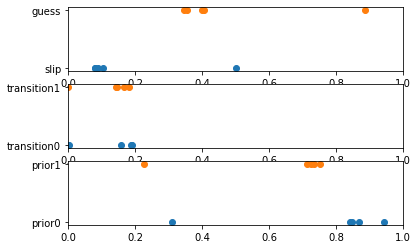

Cluster ... 3
# Rows ... 13361
# Students ... 1203
# Skills ... 2


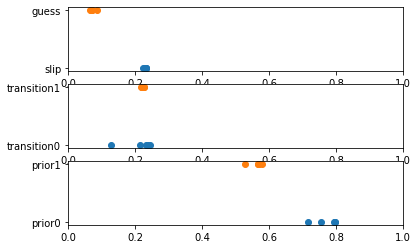

Cluster ... 2
# Rows ... 9766
# Students ... 894
# Skills ... 4


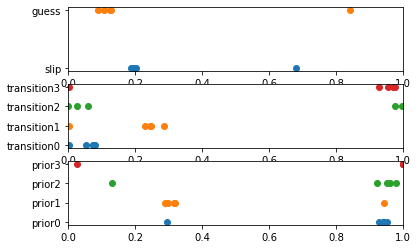

Cluster ... 0
# Rows ... 7547
# Students ... 961
# Skills ... 2


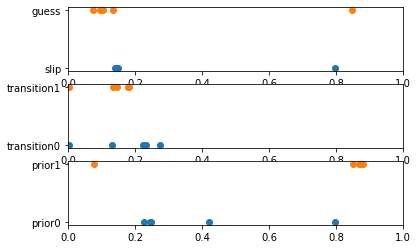

Cluster ... 3
# Rows ... 18742
# Students ... 1225
# Skills ... 1


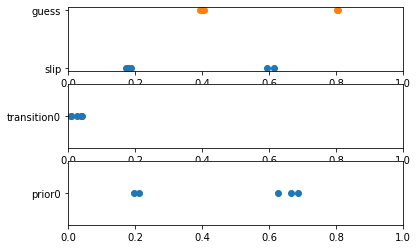

Cluster ... 2
# Rows ... 20434
# Students ... 1087
# Skills ... 5


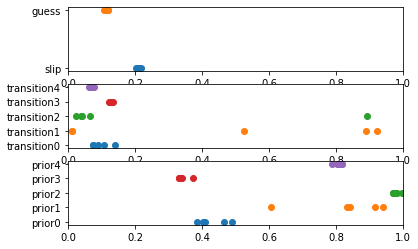

In [2]:
with torch.no_grad():
    for (i, (ms, df)) in enumerate(zip(blocks_trainer.models, block_dfs)):
        # extract fitted parameters
        priors, transitions, slips, guesses = ([] for i in range(4))
        for m in ms:
            priors.append(torch.softmax(m.priors, dim=1).numpy()[:, 1])
            transitions.append(torch.softmax(m.transition.transition_matrix, dim=1).numpy()[:, 1])
            slips.append(torch.softmax(m.emission.emission_matrix, dim=1).numpy()[1, 0])
            guesses.append(torch.softmax(m.emission.emission_matrix, dim=1).numpy()[0, 1])
        # print block characteristics 
        print(f'Cluster ... {block_characteristics["cluster"][i]}')
        print(f'# Rows ... {df.shape[0]}')
        print(f'# Students ... {df["user_id"].nunique()}')
        print(f'# Skills ... {df.shape[1] - 4}')
        # slip and guess
        plt.subplot(3, 1, 1)
        plt.scatter(slips, ['slip'] * len(slips))
        plt.scatter(guesses, ['guess'] * len(guesses))
        plt.xlim(0, 1)
        # transitions
        plt.subplot(3, 1, 2)
        for i in range(len(transitions[0])):
            y = ['transition' + str(i)] * len(transitions)
            x = [t[i] for t in transitions]
            plt.scatter(x, y)
            plt.xlim(0, 1)
        # priors
        plt.subplot(3, 1, 3)
        for i in range(len(priors[0])):
            y = ['prior' + str(i)] * len(priors)
            x = [t[i] for t in priors]
            plt.scatter(x, y)
            plt.xlim(0, 1)
        plt.show()

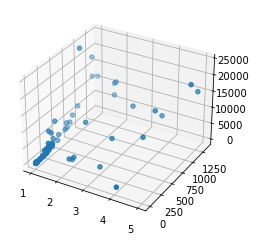

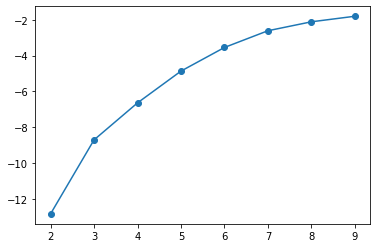

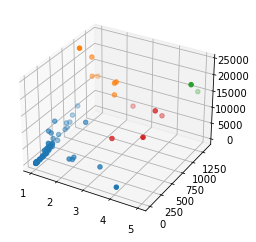

In [3]:
import torch
import pickle
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import PolynomialFeatures, MinMaxScaler
# importing/exporting parameters

path = 'data/skill_builder_data_corrected_collapsed.csv'
blocks_file = 'output/blocksdfs_blocks_001.pkl'
blocks_trainer_file = 'output/blocks_trainer_001.pkl'
bkt_params_file = 'output/bkt_params_001.pkl'
if __name__ == '__main__':
    #### 0. LOAD INPUT
    # load skillbuilder data
    with open(blocks_file, 'rb') as out:
        block_dfs, blocks = pickle.load(out)
    # load trained blocks trainer
    with open(blocks_trainer_file, 'rb') as out: 
        blocks_trainer = pickle.load(out)
    #### 1. DIFFERENT GROUPS OF BLOCKS (N_SKILLS, N_STUDENTS, N_ROWS) AND HYPERPARAMETERS (LR, N_STEPS, DELTA)
    # extract block characteristics
    n_skills, n_students, n_rows = ([] for i in range(3))
    for df in block_dfs:
        n_skills.append(df.shape[1] - 4)
        n_students.append(df["user_id"].nunique())
        n_rows.append(df.shape[0])
    # create dataframe
    block_characteristics = pd.DataFrame({
        'n_skills': n_skills,
        'n_students': n_students,
        'n_rows': n_rows
    })
    # plot block characteristics
    fig = plt.figure()
    ax = fig.add_subplot(projection='3d')
    ax.scatter(n_skills, n_students, n_rows)
    plt.show()
    # preprocess dataframe
    X = block_characteristics.values
    poly = PolynomialFeatures(2)
    X = poly.fit_transform(X)
    scaler = MinMaxScaler()
    X = scaler.fit_transform(X)
    # kmeans clustering
    labels = {}
    scores = []
    for k in range(2, 10):
        kmeans = KMeans(n_clusters=k).fit(X)
        labels[k] = kmeans.labels_
        scores.append(kmeans.score(X))
    # cluster results (ellbow trick)
    plt.plot(range(2, 10), scores)
    plt.scatter(range(2, 10), scores)
    plt.show()
    block_characteristics['cluster'] = labels[4]
    # plot clustered block characteristics
    fig = plt.figure()
    ax = fig.add_subplot(projection='3d')
    for k in range(4):
        subset = block_characteristics['cluster'] == k
        ax.scatter(block_characteristics['n_skills'][subset],
                   block_characteristics['n_students'][subset],
                   block_characteristics['n_rows'][subset])
    plt.show()

Cluster ... 0
# Rows ... 1332
# Students ... 318
# Skills ... 1


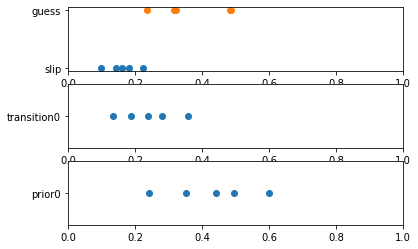

Cluster ... 0
# Rows ... 717
# Students ... 264
# Skills ... 3


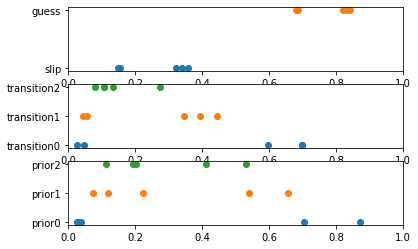

Cluster ... 0
# Rows ... 456
# Students ... 202
# Skills ... 1


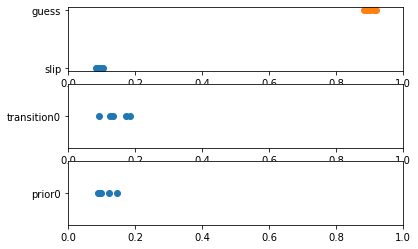

Cluster ... 0
# Rows ... 8757
# Students ... 525
# Skills ... 2


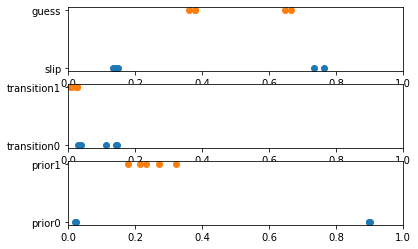

Cluster ... 0
# Rows ... 213
# Students ... 75
# Skills ... 1


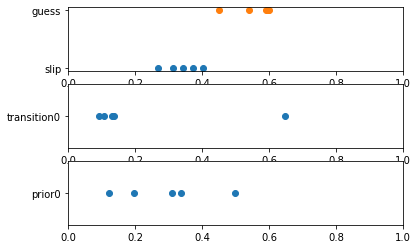

Cluster ... 0
# Rows ... 90
# Students ... 15
# Skills ... 1


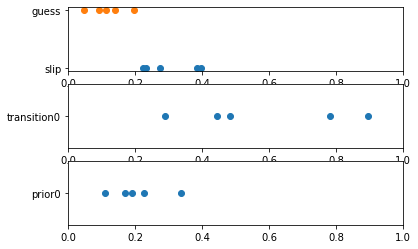

Cluster ... 0
# Rows ... 389
# Students ... 88
# Skills ... 1


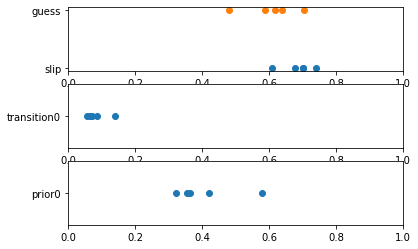

Cluster ... 0
# Rows ... 89
# Students ... 41
# Skills ... 4


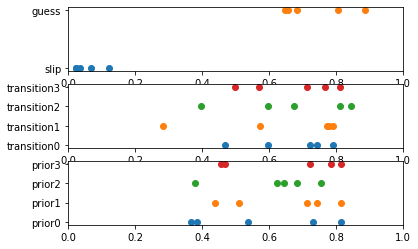

Cluster ... 0
# Rows ... 47
# Students ... 29
# Skills ... 1


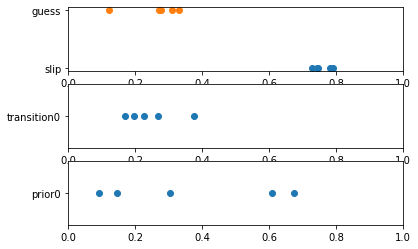

Cluster ... 0
# Rows ... 117
# Students ... 41
# Skills ... 1


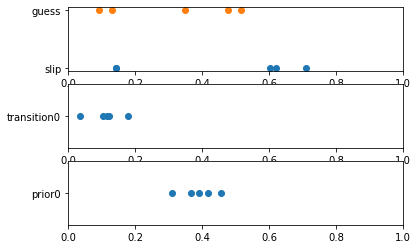

Cluster ... 0
# Rows ... 1183
# Students ... 264
# Skills ... 2


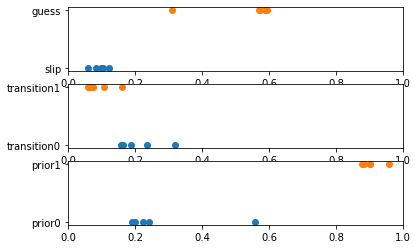

Cluster ... 0
# Rows ... 91
# Students ... 39
# Skills ... 1


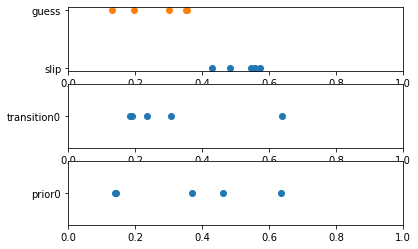

Cluster ... 0
# Rows ... 1524
# Students ... 458
# Skills ... 1


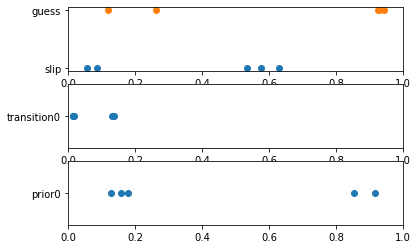

Cluster ... 0
# Rows ... 278
# Students ... 140
# Skills ... 1


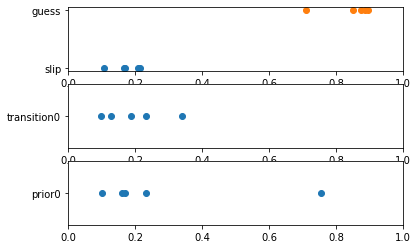

Cluster ... 0
# Rows ... 6611
# Students ... 283
# Skills ... 1


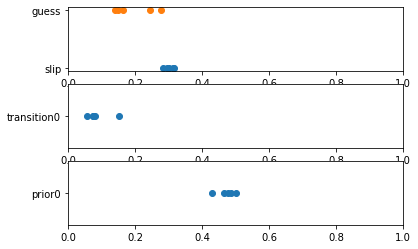

Cluster ... 0
# Rows ... 1970
# Students ... 348
# Skills ... 1


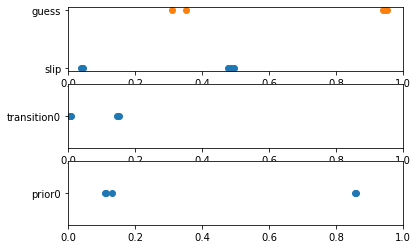

Cluster ... 1
# Rows ... 12741
# Students ... 1226
# Skills ... 1


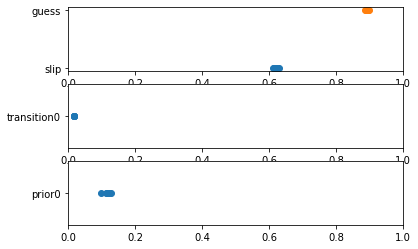

Cluster ... 3
# Rows ... 8980
# Students ... 1063
# Skills ... 4


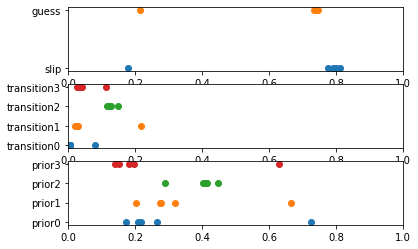

Cluster ... 0
# Rows ... 7058
# Students ... 900
# Skills ... 1


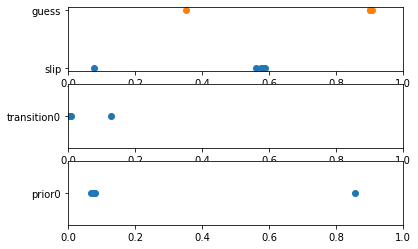

Cluster ... 1
# Rows ... 11334
# Students ... 1353
# Skills ... 1


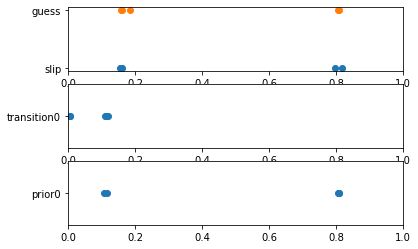

Cluster ... 0
# Rows ... 459
# Students ... 176
# Skills ... 1


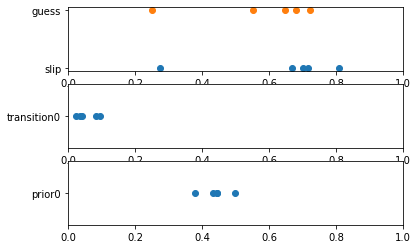

Cluster ... 0
# Rows ... 877
# Students ... 233
# Skills ... 2


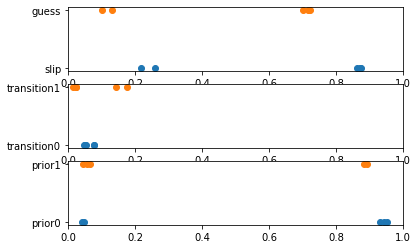

Cluster ... 0
# Rows ... 1760
# Students ... 194
# Skills ... 1


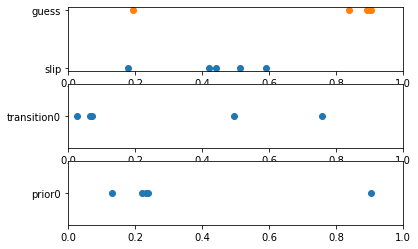

Cluster ... 0
# Rows ... 115
# Students ... 95
# Skills ... 1


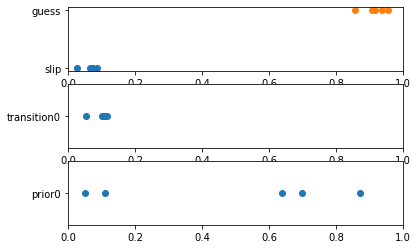

Cluster ... 0
# Rows ... 495
# Students ... 215
# Skills ... 1


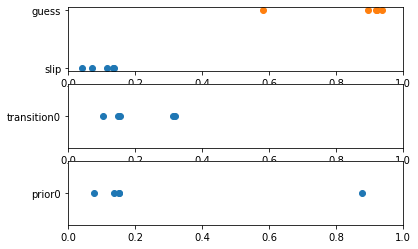

Cluster ... 0
# Rows ... 2978
# Students ... 269
# Skills ... 1


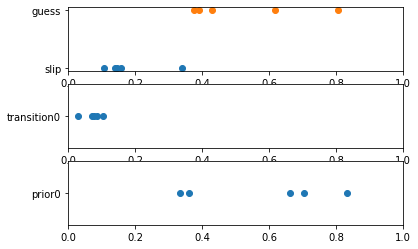

Cluster ... 0
# Rows ... 286
# Students ... 168
# Skills ... 1


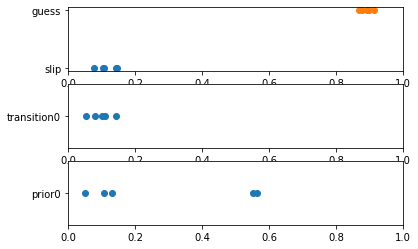

Cluster ... 0
# Rows ... 491
# Students ... 135
# Skills ... 1


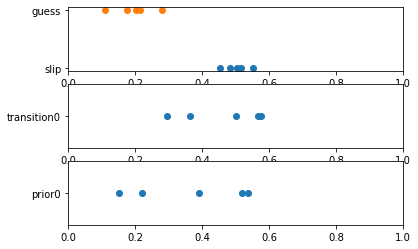

Cluster ... 0
# Rows ... 1480
# Students ... 283
# Skills ... 1


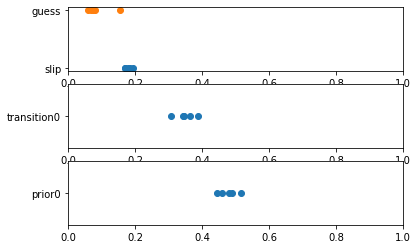

Cluster ... 0
# Rows ... 1285
# Students ... 304
# Skills ... 1


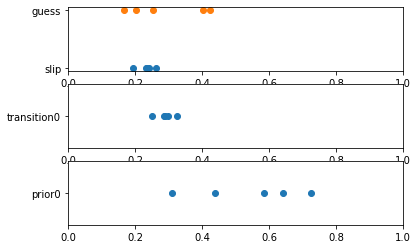

Cluster ... 0
# Rows ... 926
# Students ... 345
# Skills ... 1


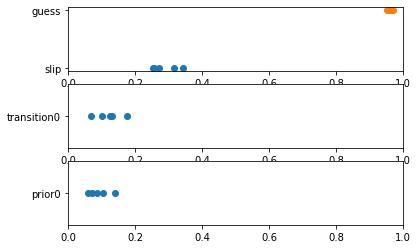

Cluster ... 0
# Rows ... 1706
# Students ... 184
# Skills ... 1


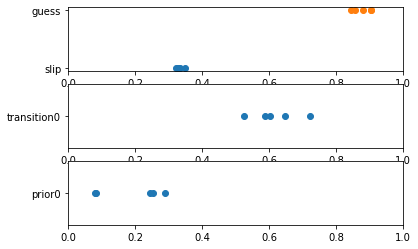

Cluster ... 0
# Rows ... 3072
# Students ... 664
# Skills ... 1


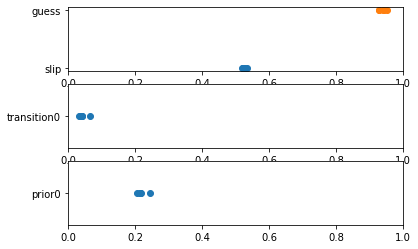

Cluster ... 0
# Rows ... 4659
# Students ... 651
# Skills ... 1


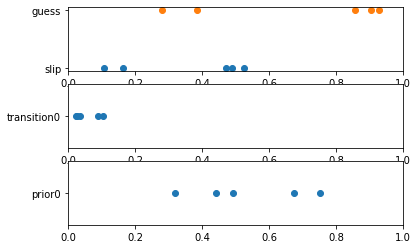

Cluster ... 1
# Rows ... 24253
# Students ... 961
# Skills ... 1


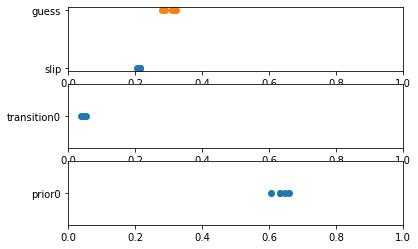

Cluster ... 0
# Rows ... 8115
# Students ... 412
# Skills ... 1


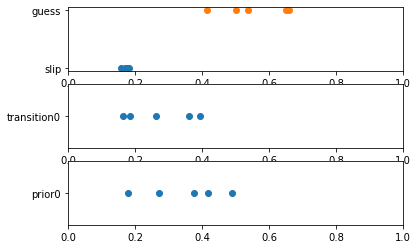

Cluster ... 0
# Rows ... 305
# Students ... 11
# Skills ... 1


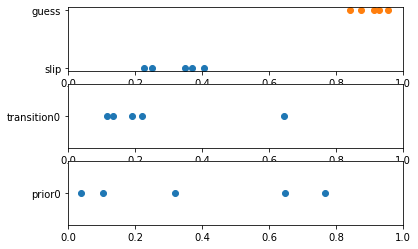

Cluster ... 0
# Rows ... 237
# Students ... 147
# Skills ... 1


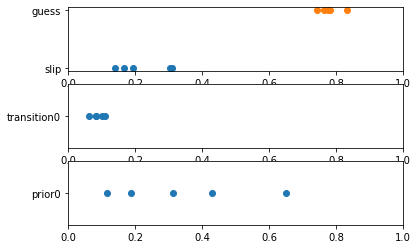

Cluster ... 0
# Rows ... 280
# Students ... 229
# Skills ... 1


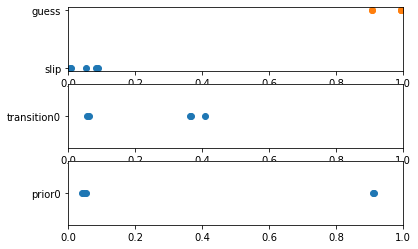

Cluster ... 0
# Rows ... 949
# Students ... 223
# Skills ... 1


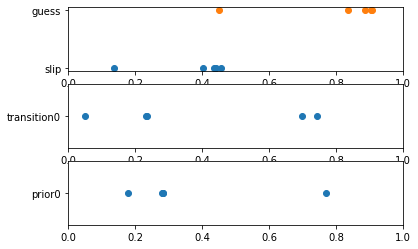

Cluster ... 0
# Rows ... 36
# Students ... 8
# Skills ... 1


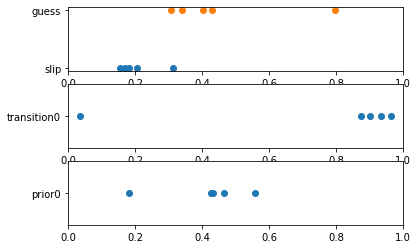

Cluster ... 0
# Rows ... 5398
# Students ... 333
# Skills ... 1


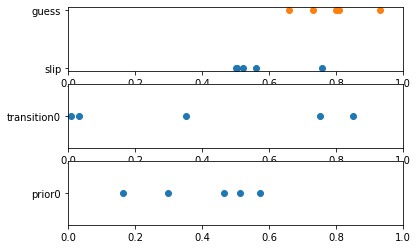

Cluster ... 0
# Rows ... 102
# Students ... 6
# Skills ... 1


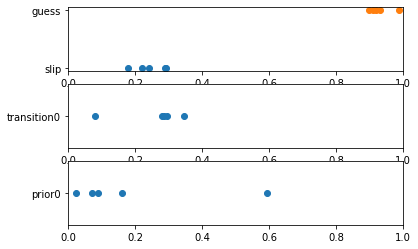

Cluster ... 0
# Rows ... 32
# Students ... 30
# Skills ... 1


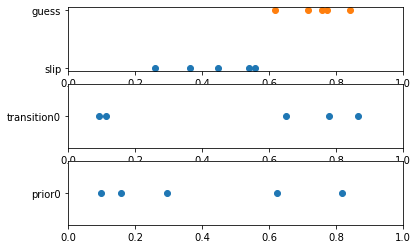

Cluster ... 0
# Rows ... 392
# Students ... 13
# Skills ... 1


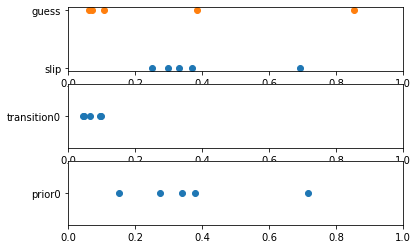

Cluster ... 0
# Rows ... 234
# Students ... 22
# Skills ... 1


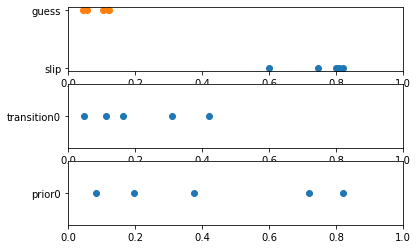

Cluster ... 0
# Rows ... 32
# Students ... 14
# Skills ... 1


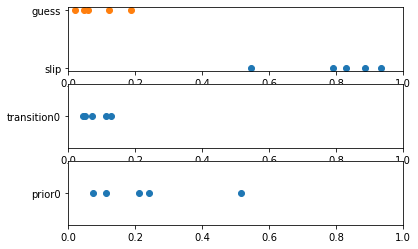

Cluster ... 0
# Rows ... 87
# Students ... 6
# Skills ... 1


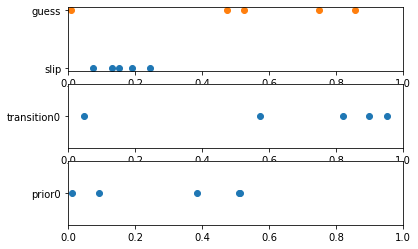

Cluster ... 0
# Rows ... 33
# Students ... 33
# Skills ... 1


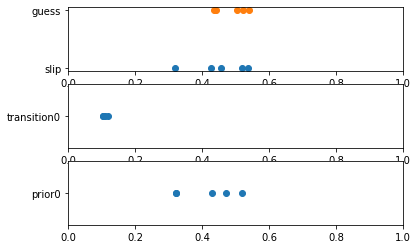

Cluster ... 0
# Rows ... 398
# Students ... 28
# Skills ... 1


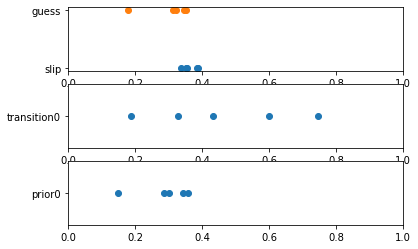

Cluster ... 0
# Rows ... 1792
# Students ... 307
# Skills ... 1


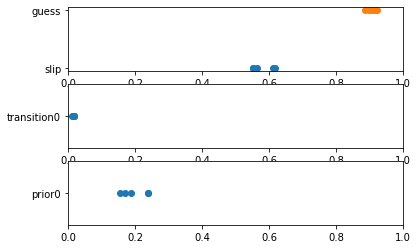

Cluster ... 0
# Rows ... 108
# Students ... 5
# Skills ... 1


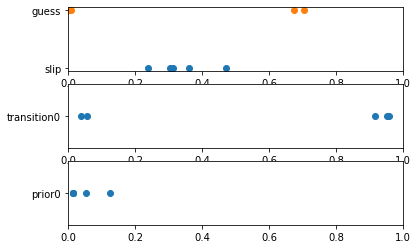

Cluster ... 0
# Rows ... 1895
# Students ... 167
# Skills ... 2


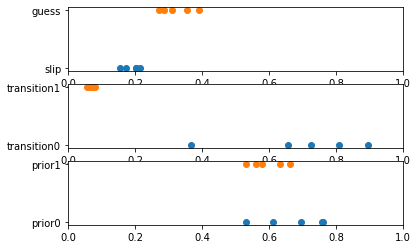

Cluster ... 0
# Rows ... 353
# Students ... 20
# Skills ... 1


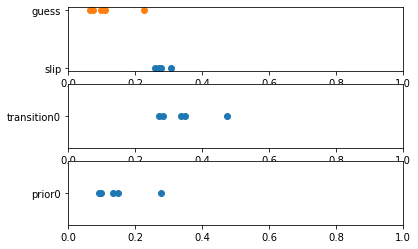

Cluster ... 0
# Rows ... 1149
# Students ... 264
# Skills ... 1


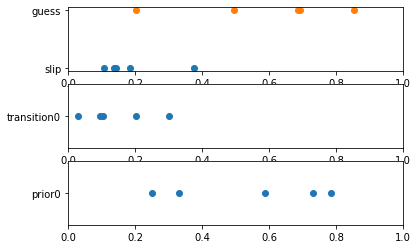

Cluster ... 0
# Rows ... 1804
# Students ... 230
# Skills ... 1


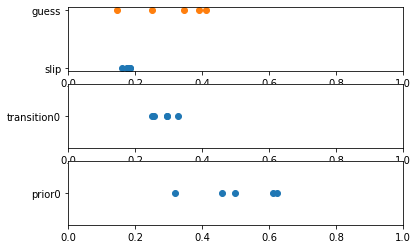

Cluster ... 0
# Rows ... 1769
# Students ... 256
# Skills ... 1


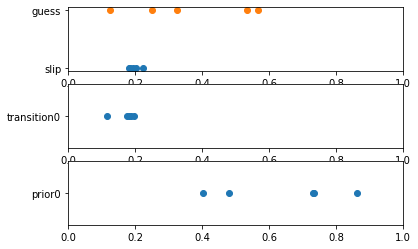

Cluster ... 0
# Rows ... 671
# Students ... 264
# Skills ... 1


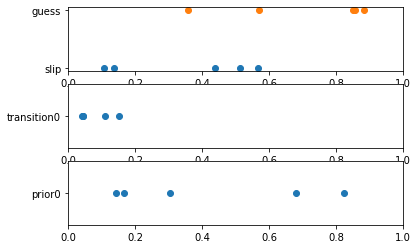

Cluster ... 1
# Rows ... 13434
# Students ... 1164
# Skills ... 2


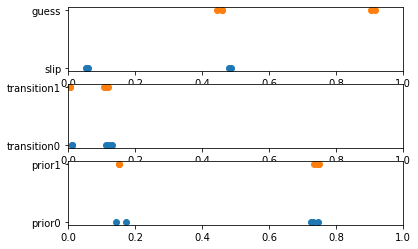

Cluster ... 0
# Rows ... 951
# Students ... 229
# Skills ... 1


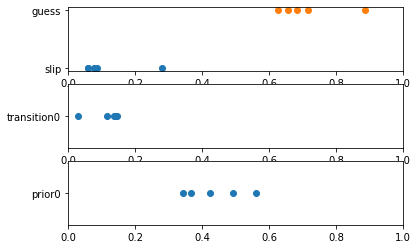

Cluster ... 0
# Rows ... 4029
# Students ... 724
# Skills ... 1


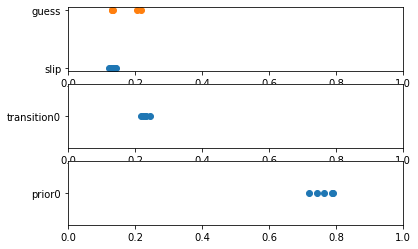

Cluster ... 0
# Rows ... 3256
# Students ... 367
# Skills ... 1


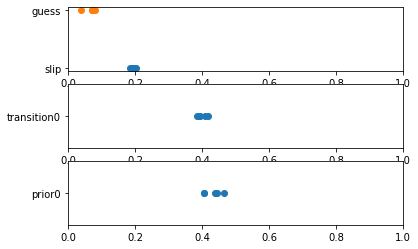

Cluster ... 0
# Rows ... 5547
# Students ... 783
# Skills ... 1


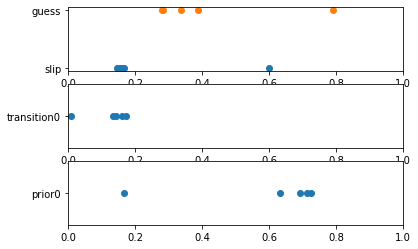

Cluster ... 0
# Rows ... 3050
# Students ... 483
# Skills ... 1


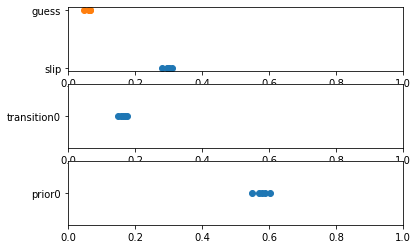

Cluster ... 0
# Rows ... 1859
# Students ... 354
# Skills ... 1


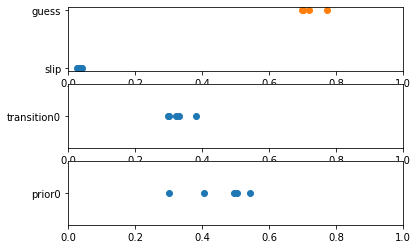

Cluster ... 0
# Rows ... 288
# Students ... 87
# Skills ... 1


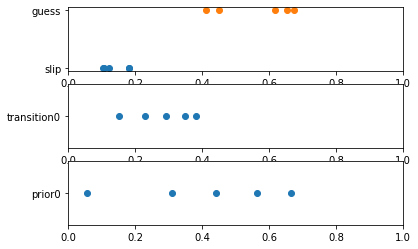

Cluster ... 0
# Rows ... 1888
# Students ... 270
# Skills ... 1


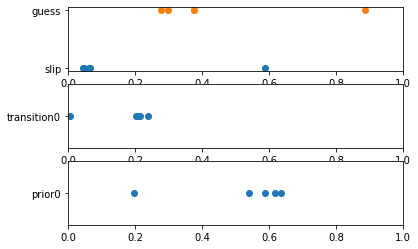

Cluster ... 0
# Rows ... 2813
# Students ... 274
# Skills ... 1


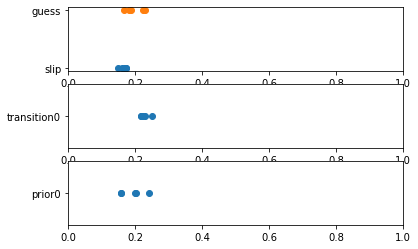

Cluster ... 0
# Rows ... 646
# Students ... 155
# Skills ... 1


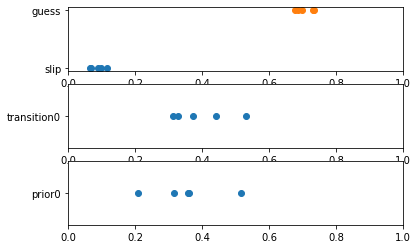

Cluster ... 0
# Rows ... 2947
# Students ... 619
# Skills ... 1


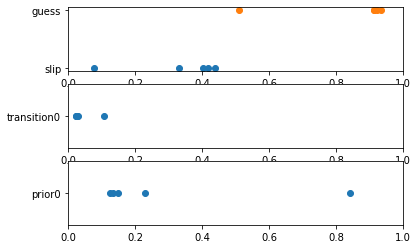

Cluster ... 0
# Rows ... 632
# Students ... 206
# Skills ... 1


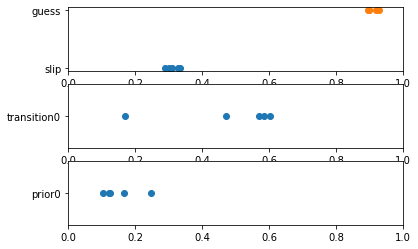

Cluster ... 0
# Rows ... 1533
# Students ... 346
# Skills ... 1


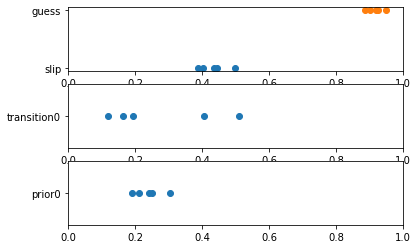

Cluster ... 0
# Rows ... 843
# Students ... 282
# Skills ... 1


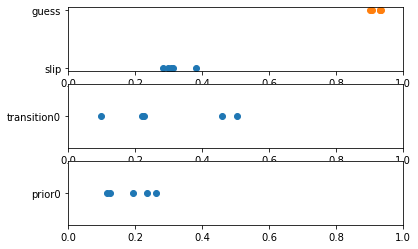

Cluster ... 3
# Rows ... 10417
# Students ... 999
# Skills ... 3


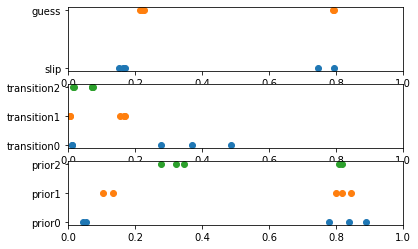

Cluster ... 3
# Rows ... 12450
# Students ... 900
# Skills ... 4


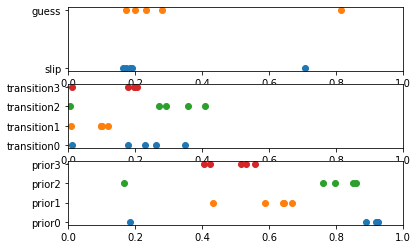

Cluster ... 3
# Rows ... 6145
# Students ... 527
# Skills ... 3


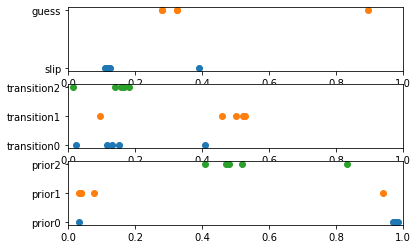

Cluster ... 3
# Rows ... 7717
# Students ... 625
# Skills ... 4


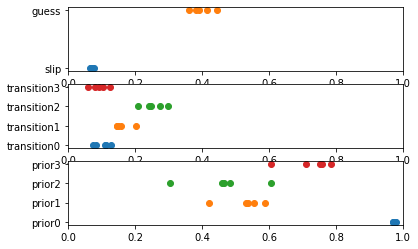

Cluster ... 1
# Rows ... 9772
# Students ... 1161
# Skills ... 2


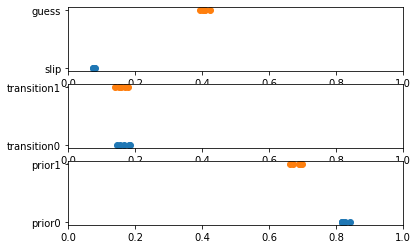

Cluster ... 1
# Rows ... 13361
# Students ... 1203
# Skills ... 2


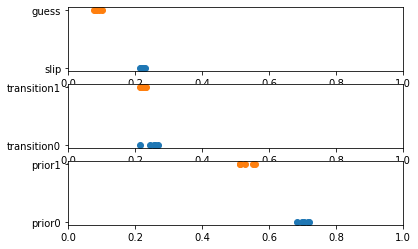

Cluster ... 2
# Rows ... 16323
# Students ... 1263
# Skills ... 5


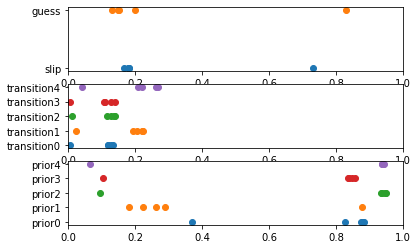

Cluster ... 0
# Rows ... 109
# Students ... 34
# Skills ... 1


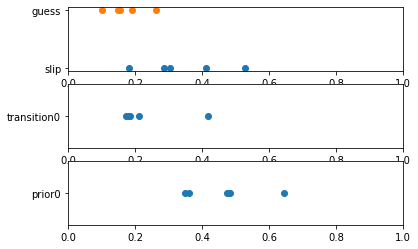

Cluster ... 2
# Rows ... 20434
# Students ... 1087
# Skills ... 5


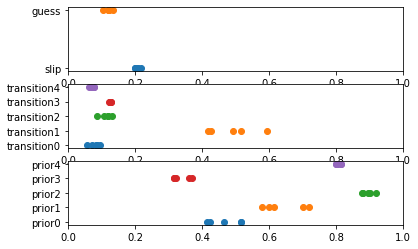

Cluster ... 1
# Rows ... 18742
# Students ... 1225
# Skills ... 1


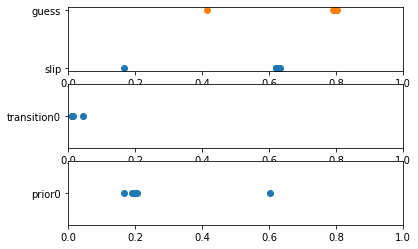

In [4]:
with torch.no_grad():
    for (i, (ms, df)) in enumerate(zip(blocks_trainer.models, block_dfs)):
        # extract fitted parameters
        priors, transitions, slips, guesses = ([] for i in range(4))
        for m in ms:
            priors.append(torch.softmax(m.priors, dim=1).numpy()[:, 1])
            transitions.append(torch.softmax(m.transition.transition_matrix, dim=1).numpy()[:, 1])
            slips.append(torch.softmax(m.emission.emission_matrix, dim=1).numpy()[1, 0])
            guesses.append(torch.softmax(m.emission.emission_matrix, dim=1).numpy()[0, 1])
        # print block characteristics 
        print(f'Cluster ... {block_characteristics["cluster"][i]}')
        print(f'# Rows ... {df.shape[0]}')
        print(f'# Students ... {df["user_id"].nunique()}')
        print(f'# Skills ... {df.shape[1] - 4}')
        # slip and guess
        plt.subplot(3, 1, 1)
        plt.scatter(slips, ['slip'] * len(slips))
        plt.scatter(guesses, ['guess'] * len(guesses))
        plt.xlim(0, 1)
        # transitions
        plt.subplot(3, 1, 2)
        for i in range(len(transitions[0])):
            y = ['transition' + str(i)] * len(transitions)
            x = [t[i] for t in transitions]
            plt.scatter(x, y)
            plt.xlim(0, 1)
        # priors
        plt.subplot(3, 1, 3)
        for i in range(len(priors[0])):
            y = ['prior' + str(i)] * len(priors)
            x = [t[i] for t in priors]
            plt.scatter(x, y)
            plt.xlim(0, 1)
        plt.show()

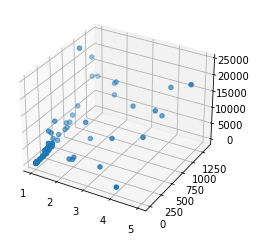

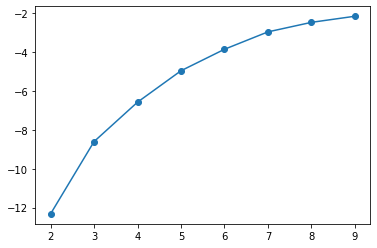

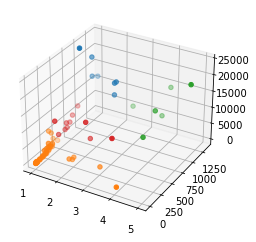

In [5]:
import torch
import pickle
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import PolynomialFeatures, MinMaxScaler
# importing/exporting parameters

path = 'data/skill_builder_data_corrected_collapsed.csv'
blocks_file = 'output/blocksdfs_blocks_01.pkl'
blocks_trainer_file = 'output/blocks_trainer_01.pkl'
bkt_params_file = 'output/bkt_params_01.pkl'
if __name__ == '__main__':
    #### 0. LOAD INPUT
    # load skillbuilder data
    with open(blocks_file, 'rb') as out:
        block_dfs, blocks = pickle.load(out)
    # load trained blocks trainer
    with open(blocks_trainer_file, 'rb') as out: 
        blocks_trainer = pickle.load(out)
    #### 1. DIFFERENT GROUPS OF BLOCKS (N_SKILLS, N_STUDENTS, N_ROWS) AND HYPERPARAMETERS (LR, N_STEPS, DELTA)
    # extract block characteristics
    n_skills, n_students, n_rows = ([] for i in range(3))
    for df in block_dfs:
        n_skills.append(df.shape[1] - 4)
        n_students.append(df["user_id"].nunique())
        n_rows.append(df.shape[0])
    # create dataframe
    block_characteristics = pd.DataFrame({
        'n_skills': n_skills,
        'n_students': n_students,
        'n_rows': n_rows
    })
    # plot block characteristics
    fig = plt.figure()
    ax = fig.add_subplot(projection='3d')
    ax.scatter(n_skills, n_students, n_rows)
    plt.show()
    # preprocess dataframe
    X = block_characteristics.values
    poly = PolynomialFeatures(2)
    X = poly.fit_transform(X)
    scaler = MinMaxScaler()
    X = scaler.fit_transform(X)
    # kmeans clustering
    labels = {}
    scores = []
    for k in range(2, 10):
        kmeans = KMeans(n_clusters=k).fit(X)
        labels[k] = kmeans.labels_
        scores.append(kmeans.score(X))
    # cluster results (ellbow trick)
    plt.plot(range(2, 10), scores)
    plt.scatter(range(2, 10), scores)
    plt.show()
    block_characteristics['cluster'] = labels[4]
    # plot clustered block characteristics
    fig = plt.figure()
    ax = fig.add_subplot(projection='3d')
    for k in range(4):
        subset = block_characteristics['cluster'] == k
        ax.scatter(block_characteristics['n_skills'][subset],
                   block_characteristics['n_students'][subset],
                   block_characteristics['n_rows'][subset])
    plt.show()

Cluster ... 1
# Rows ... 1332
# Students ... 318
# Skills ... 1


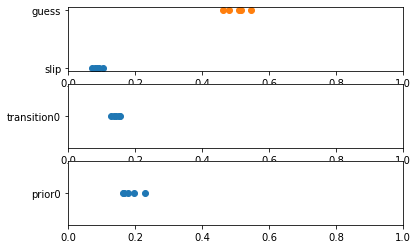

Cluster ... 1
# Rows ... 717
# Students ... 264
# Skills ... 3


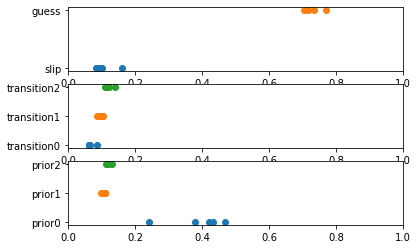

Cluster ... 1
# Rows ... 456
# Students ... 202
# Skills ... 1


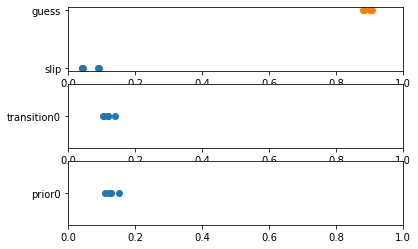

Cluster ... 3
# Rows ... 8757
# Students ... 525
# Skills ... 2


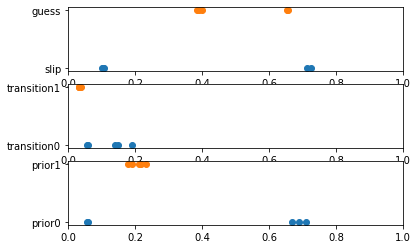

Cluster ... 1
# Rows ... 213
# Students ... 75
# Skills ... 1


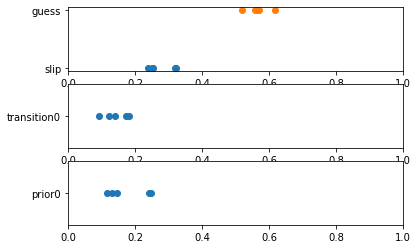

Cluster ... 1
# Rows ... 90
# Students ... 15
# Skills ... 1


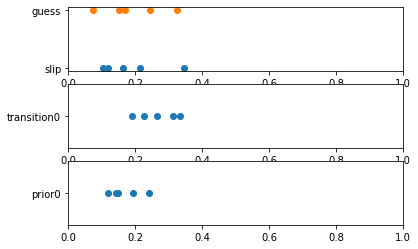

Cluster ... 1
# Rows ... 389
# Students ... 88
# Skills ... 1


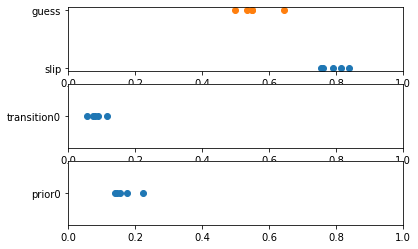

Cluster ... 1
# Rows ... 89
# Students ... 41
# Skills ... 4


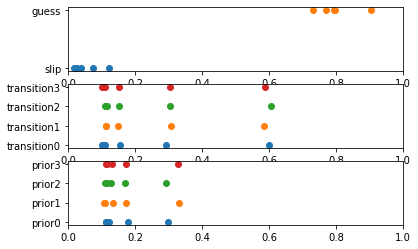

Cluster ... 1
# Rows ... 47
# Students ... 29
# Skills ... 1


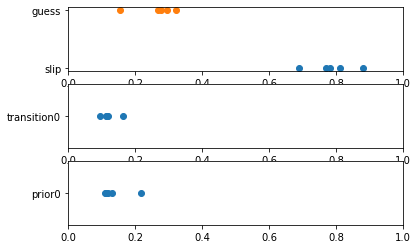

Cluster ... 1
# Rows ... 117
# Students ... 41
# Skills ... 1


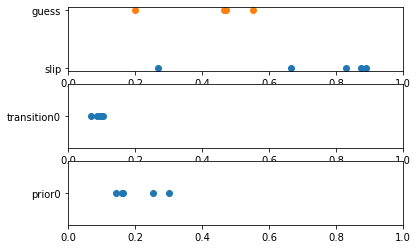

Cluster ... 1
# Rows ... 1183
# Students ... 264
# Skills ... 2


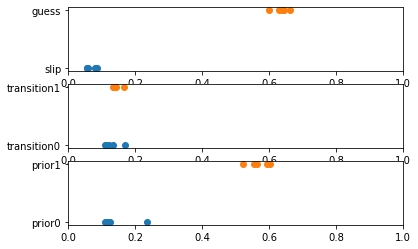

Cluster ... 1
# Rows ... 91
# Students ... 39
# Skills ... 1


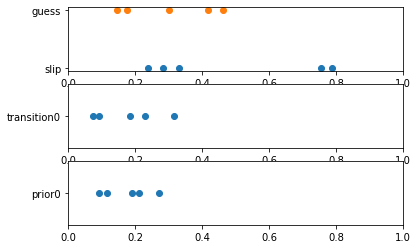

Cluster ... 1
# Rows ... 1524
# Students ... 458
# Skills ... 1


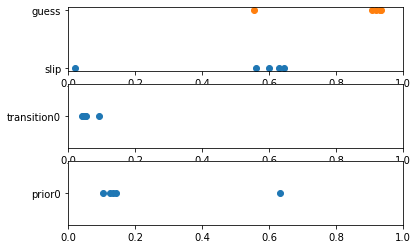

Cluster ... 1
# Rows ... 278
# Students ... 140
# Skills ... 1


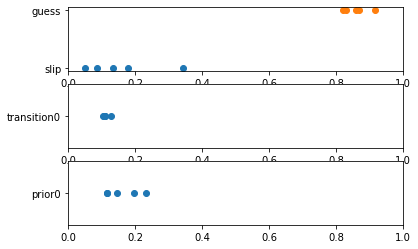

Cluster ... 1
# Rows ... 6611
# Students ... 283
# Skills ... 1


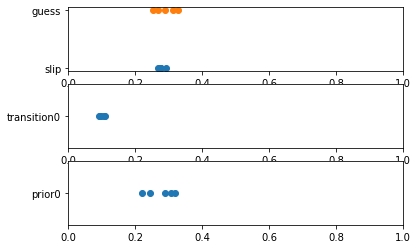

Cluster ... 1
# Rows ... 1970
# Students ... 348
# Skills ... 1


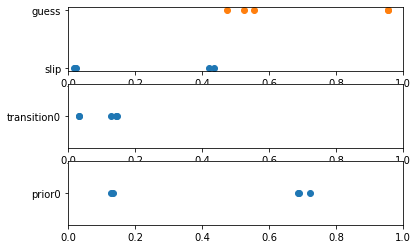

Cluster ... 0
# Rows ... 12741
# Students ... 1226
# Skills ... 1


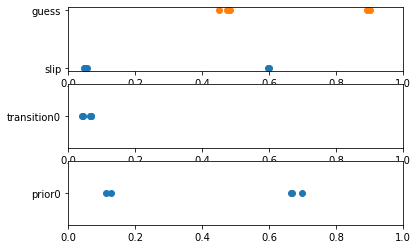

Cluster ... 2
# Rows ... 8980
# Students ... 1063
# Skills ... 4


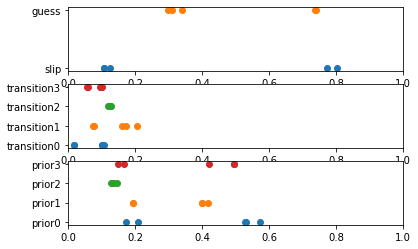

Cluster ... 3
# Rows ... 7058
# Students ... 900
# Skills ... 1


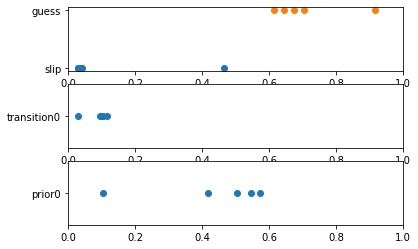

Cluster ... 0
# Rows ... 11334
# Students ... 1353
# Skills ... 1


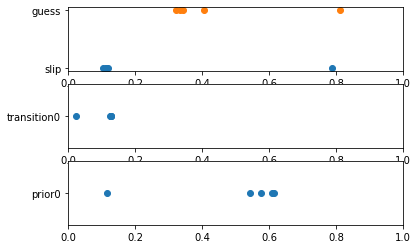

Cluster ... 1
# Rows ... 459
# Students ... 176
# Skills ... 1


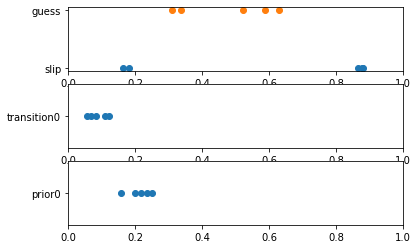

Cluster ... 1
# Rows ... 877
# Students ... 233
# Skills ... 2


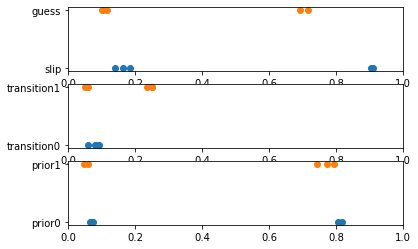

Cluster ... 1
# Rows ... 1760
# Students ... 194
# Skills ... 1


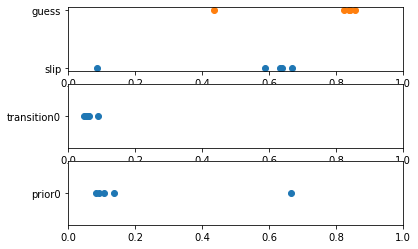

Cluster ... 1
# Rows ... 115
# Students ... 95
# Skills ... 1


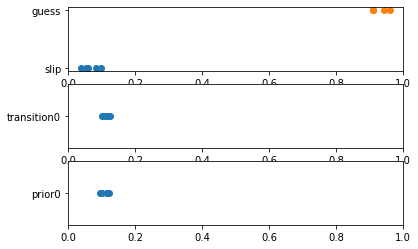

Cluster ... 1
# Rows ... 495
# Students ... 215
# Skills ... 1


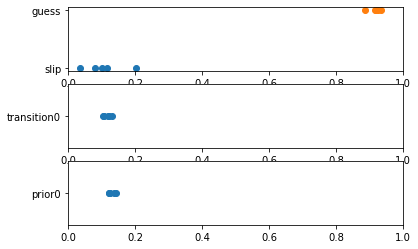

Cluster ... 1
# Rows ... 2978
# Students ... 269
# Skills ... 1


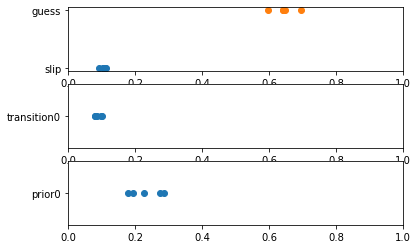

Cluster ... 1
# Rows ... 286
# Students ... 168
# Skills ... 1


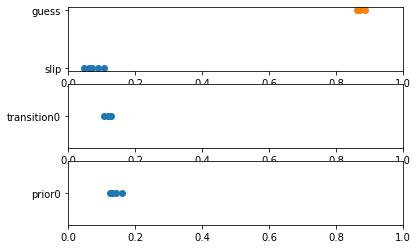

Cluster ... 1
# Rows ... 491
# Students ... 135
# Skills ... 1


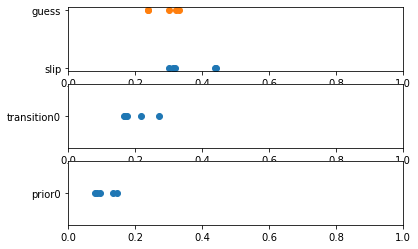

Cluster ... 1
# Rows ... 1480
# Students ... 283
# Skills ... 1


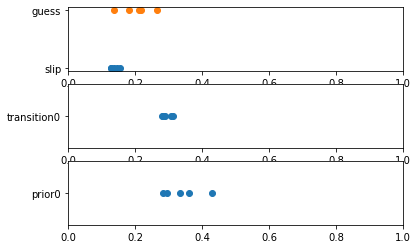

Cluster ... 1
# Rows ... 1285
# Students ... 304
# Skills ... 1


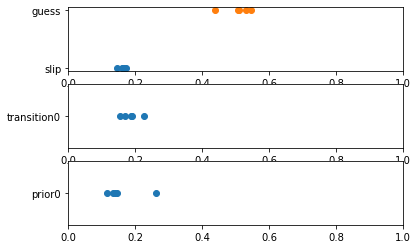

Cluster ... 1
# Rows ... 926
# Students ... 345
# Skills ... 1


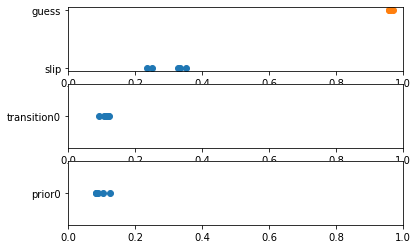

Cluster ... 1
# Rows ... 1706
# Students ... 184
# Skills ... 1


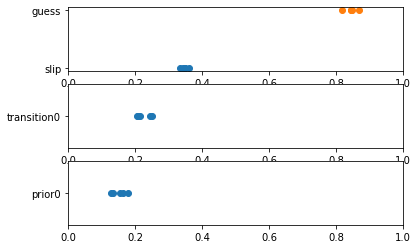

Cluster ... 3
# Rows ... 3072
# Students ... 664
# Skills ... 1


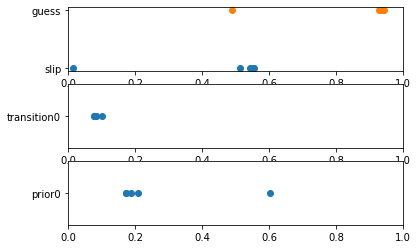

Cluster ... 3
# Rows ... 4659
# Students ... 651
# Skills ... 1


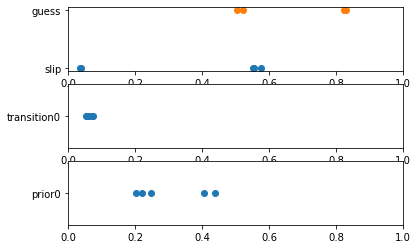

Cluster ... 0
# Rows ... 24253
# Students ... 961
# Skills ... 1


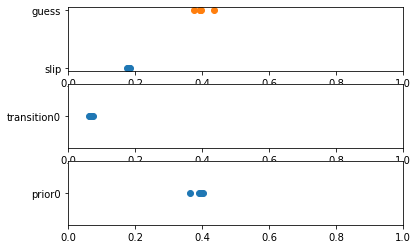

Cluster ... 3
# Rows ... 8115
# Students ... 412
# Skills ... 1


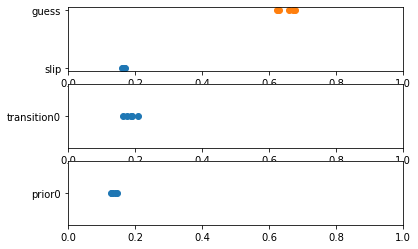

Cluster ... 1
# Rows ... 305
# Students ... 11
# Skills ... 1


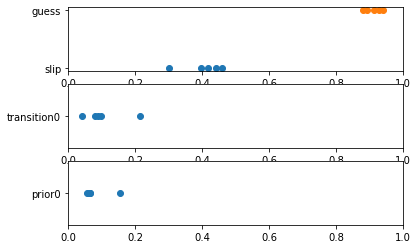

Cluster ... 1
# Rows ... 237
# Students ... 147
# Skills ... 1


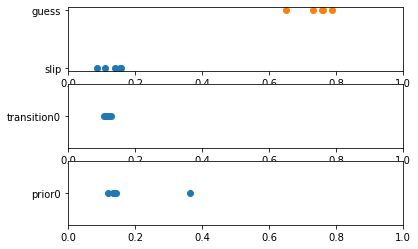

Cluster ... 1
# Rows ... 280
# Students ... 229
# Skills ... 1


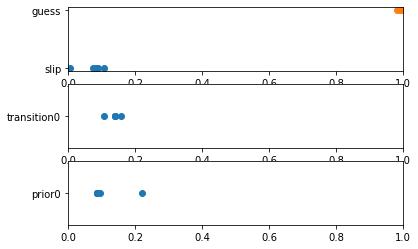

Cluster ... 1
# Rows ... 949
# Students ... 223
# Skills ... 1


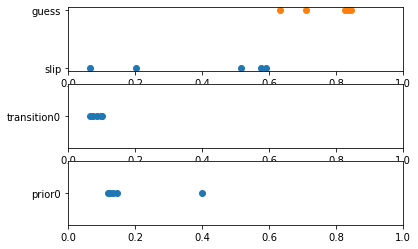

Cluster ... 1
# Rows ... 36
# Students ... 8
# Skills ... 1


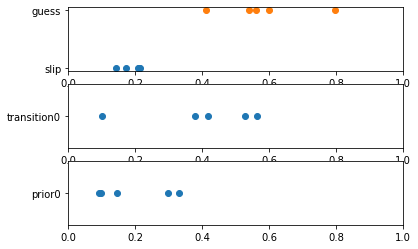

Cluster ... 1
# Rows ... 5398
# Students ... 333
# Skills ... 1


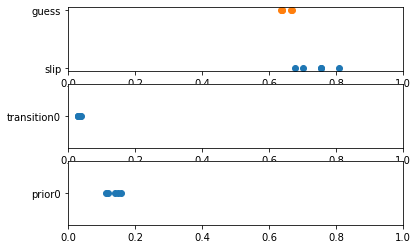

Cluster ... 1
# Rows ... 102
# Students ... 6
# Skills ... 1


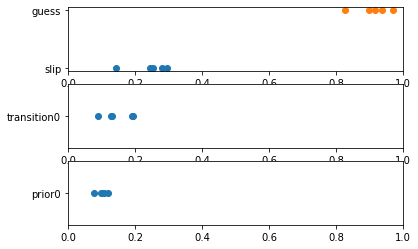

Cluster ... 1
# Rows ... 32
# Students ... 30
# Skills ... 1


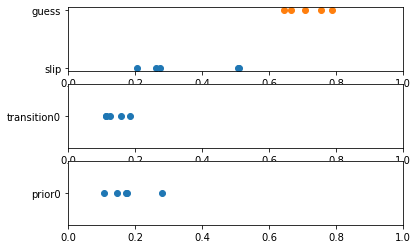

Cluster ... 1
# Rows ... 392
# Students ... 13
# Skills ... 1


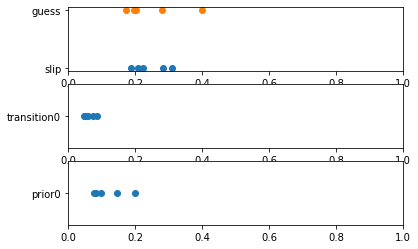

Cluster ... 1
# Rows ... 234
# Students ... 22
# Skills ... 1


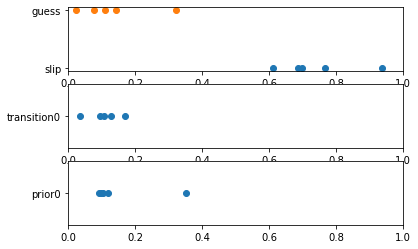

Cluster ... 1
# Rows ... 32
# Students ... 14
# Skills ... 1


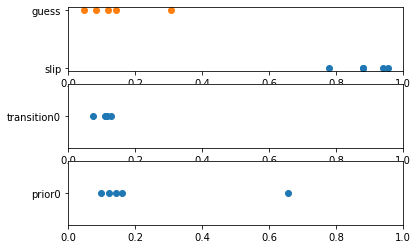

Cluster ... 1
# Rows ... 87
# Students ... 6
# Skills ... 1


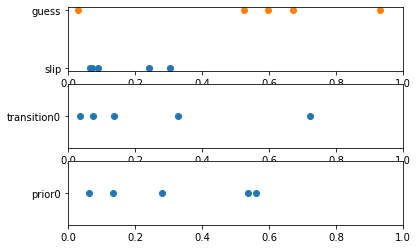

Cluster ... 1
# Rows ... 33
# Students ... 33
# Skills ... 1


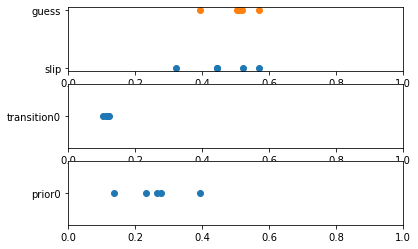

Cluster ... 1
# Rows ... 398
# Students ... 28
# Skills ... 1


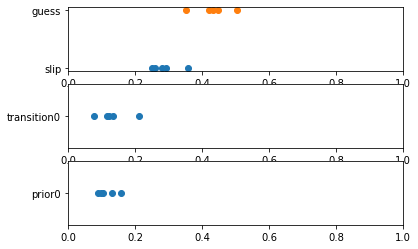

Cluster ... 1
# Rows ... 1792
# Students ... 307
# Skills ... 1


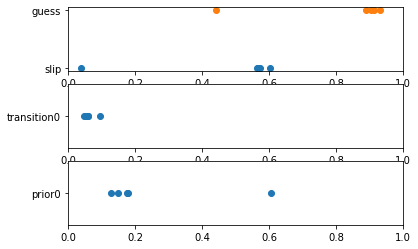

Cluster ... 1
# Rows ... 108
# Students ... 5
# Skills ... 1


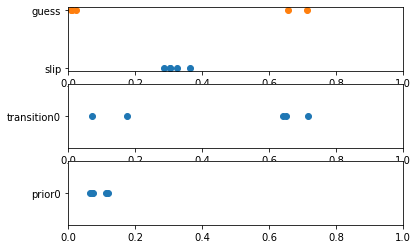

Cluster ... 1
# Rows ... 1895
# Students ... 167
# Skills ... 2


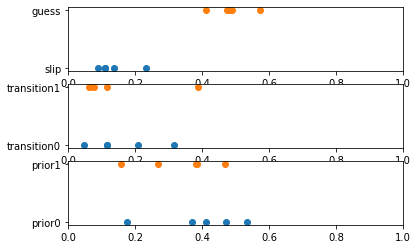

Cluster ... 1
# Rows ... 353
# Students ... 20
# Skills ... 1


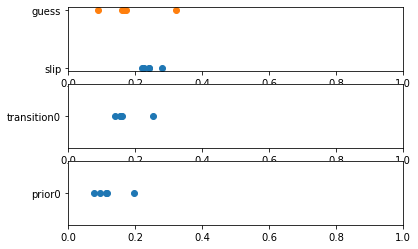

Cluster ... 1
# Rows ... 1149
# Students ... 264
# Skills ... 1


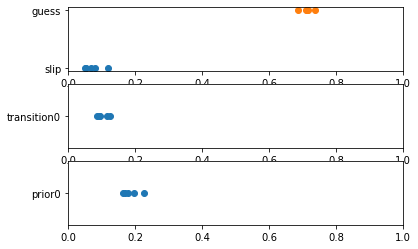

Cluster ... 1
# Rows ... 1804
# Students ... 230
# Skills ... 1


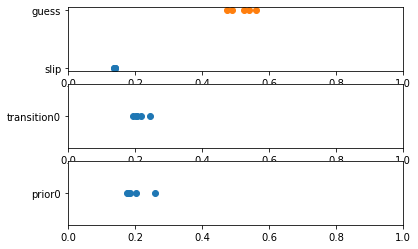

Cluster ... 1
# Rows ... 1769
# Students ... 256
# Skills ... 1


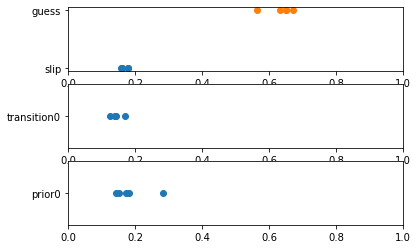

Cluster ... 1
# Rows ... 671
# Students ... 264
# Skills ... 1


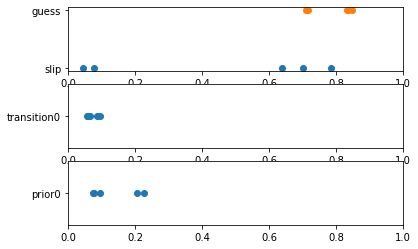

Cluster ... 0
# Rows ... 13434
# Students ... 1164
# Skills ... 2


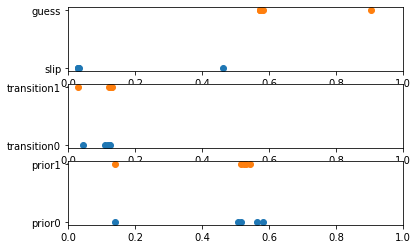

Cluster ... 1
# Rows ... 951
# Students ... 229
# Skills ... 1


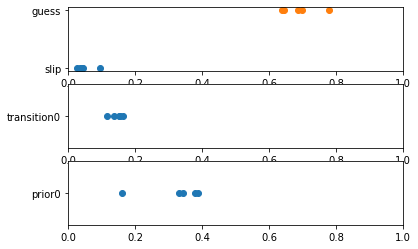

Cluster ... 3
# Rows ... 4029
# Students ... 724
# Skills ... 1


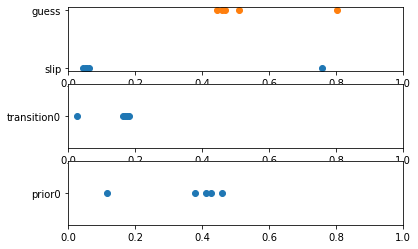

Cluster ... 1
# Rows ... 3256
# Students ... 367
# Skills ... 1


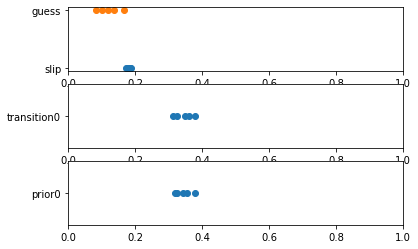

Cluster ... 3
# Rows ... 5547
# Students ... 783
# Skills ... 1


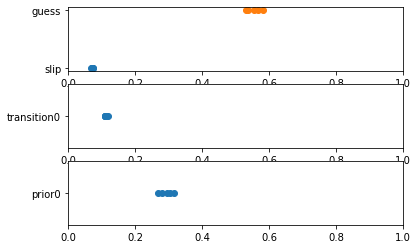

Cluster ... 3
# Rows ... 3050
# Students ... 483
# Skills ... 1


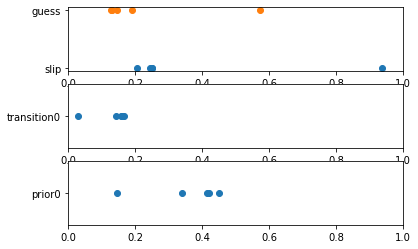

Cluster ... 1
# Rows ... 1859
# Students ... 354
# Skills ... 1


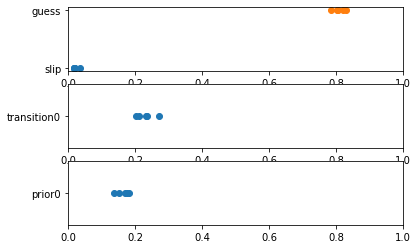

Cluster ... 1
# Rows ... 288
# Students ... 87
# Skills ... 1


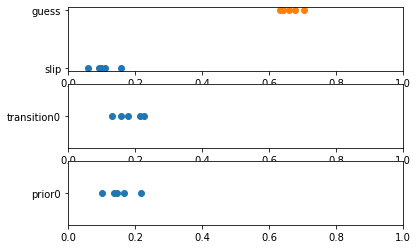

Cluster ... 1
# Rows ... 1888
# Students ... 270
# Skills ... 1


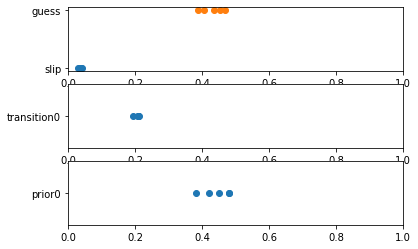

Cluster ... 1
# Rows ... 2813
# Students ... 274
# Skills ... 1


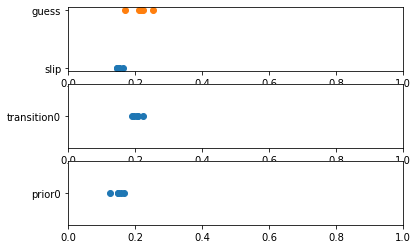

Cluster ... 1
# Rows ... 646
# Students ... 155
# Skills ... 1


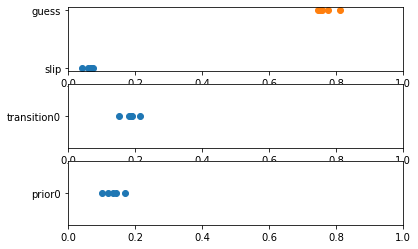

Cluster ... 3
# Rows ... 2947
# Students ... 619
# Skills ... 1


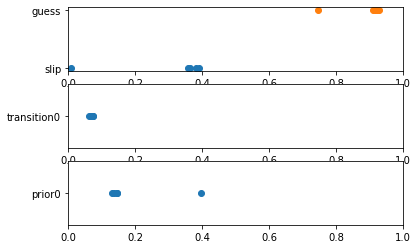

Cluster ... 1
# Rows ... 632
# Students ... 206
# Skills ... 1


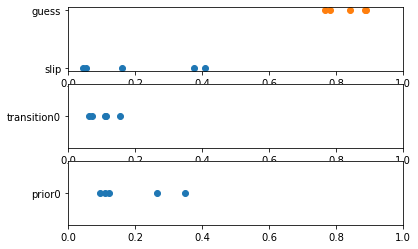

Cluster ... 1
# Rows ... 1533
# Students ... 346
# Skills ... 1


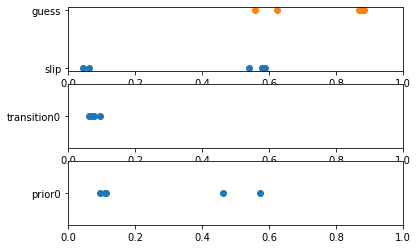

Cluster ... 1
# Rows ... 843
# Students ... 282
# Skills ... 1


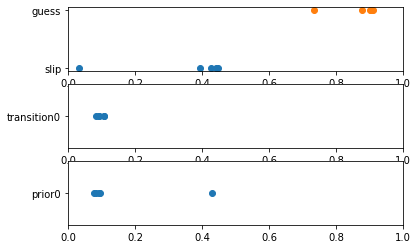

Cluster ... 2
# Rows ... 10417
# Students ... 999
# Skills ... 3


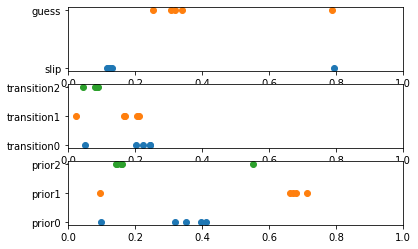

Cluster ... 2
# Rows ... 12450
# Students ... 900
# Skills ... 4


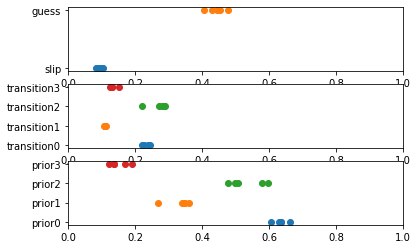

Cluster ... 3
# Rows ... 6145
# Students ... 527
# Skills ... 3


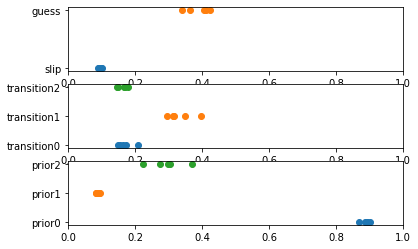

Cluster ... 2
# Rows ... 7717
# Students ... 625
# Skills ... 4


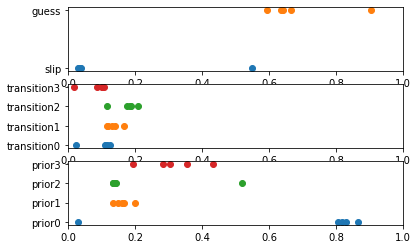

Cluster ... 0
# Rows ... 9772
# Students ... 1161
# Skills ... 2


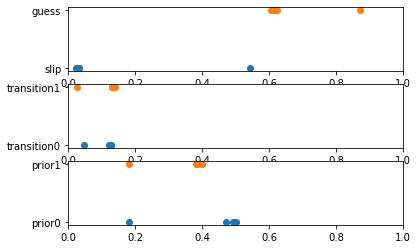

Cluster ... 0
# Rows ... 13361
# Students ... 1203
# Skills ... 2


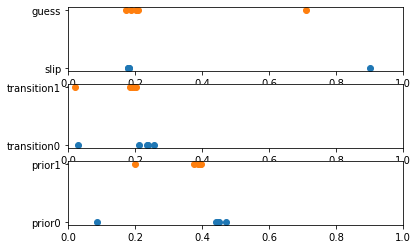

Cluster ... 3
# Rows ... 2533
# Students ... 618
# Skills ... 2


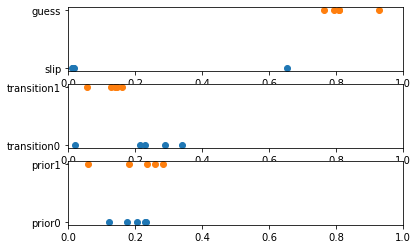

Cluster ... 2
# Rows ... 15377
# Students ... 1265
# Skills ... 4


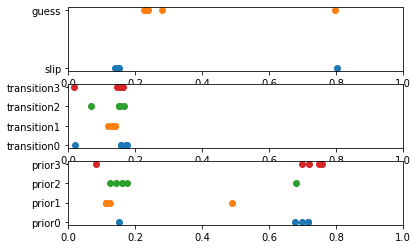

Cluster ... 2
# Rows ... 20434
# Students ... 1087
# Skills ... 5


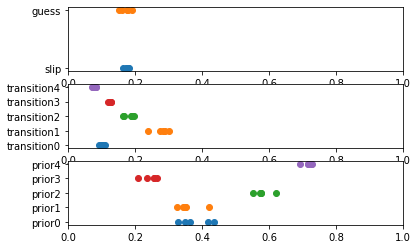

Cluster ... 0
# Rows ... 18742
# Students ... 1225
# Skills ... 1


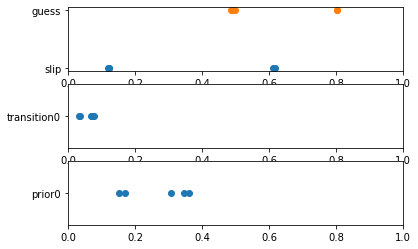

In [6]:
with torch.no_grad():
    for (i, (ms, df)) in enumerate(zip(blocks_trainer.models, block_dfs)):
        # extract fitted parameters
        priors, transitions, slips, guesses = ([] for i in range(4))
        for m in ms:
            priors.append(torch.softmax(m.priors, dim=1).numpy()[:, 1])
            transitions.append(torch.softmax(m.transition.transition_matrix, dim=1).numpy()[:, 1])
            slips.append(torch.softmax(m.emission.emission_matrix, dim=1).numpy()[1, 0])
            guesses.append(torch.softmax(m.emission.emission_matrix, dim=1).numpy()[0, 1])
        # print block characteristics 
        print(f'Cluster ... {block_characteristics["cluster"][i]}')
        print(f'# Rows ... {df.shape[0]}')
        print(f'# Students ... {df["user_id"].nunique()}')
        print(f'# Skills ... {df.shape[1] - 4}')
        # slip and guess
        plt.subplot(3, 1, 1)
        plt.scatter(slips, ['slip'] * len(slips))
        plt.scatter(guesses, ['guess'] * len(guesses))
        plt.xlim(0, 1)
        # transitions
        plt.subplot(3, 1, 2)
        for i in range(len(transitions[0])):
            y = ['transition' + str(i)] * len(transitions)
            x = [t[i] for t in transitions]
            plt.scatter(x, y)
            plt.xlim(0, 1)
        # priors
        plt.subplot(3, 1, 3)
        for i in range(len(priors[0])):
            y = ['prior' + str(i)] * len(priors)
            x = [t[i] for t in priors]
            plt.scatter(x, y)
            plt.xlim(0, 1)
        plt.show()